<img src="CUSTOMER.png"> 

# **BANK CUSTOMER SEGMENTATION**
---

The dataset for this study was assembled anonymously by data analyst of a Bank across the Kaggle website https://www.kaggle.com/datasets/sonugupta0932/bank-customer-segmentation/data. 

Overview:
The dataset contains information about bank customers’ behavior and transactions.

Objective:
The main aim of the ”Bank Customer Segmentation” project is to use smart ways like PCA, Clustering, and grouping to sort out bank customers based on how they handle their money. This helps in making the data simpler, finding important patterns, and then splitting customers into different groups. The end goal is to understand and separate different types of customers, so the bank can create special plans and services just for them. This way, the bank can make its customers happier and more engaged by offering things that suit them better.

Problem Statement: XYZ bank wants to roll out Christmas offers to their customers but does not want to roll out same offer to all customers. Instead, they want to roll out personalized offer to particular set of customers. If they manually start understanding the category of customers, then this will be not efficient and they will not be able to uncover the hidden pattern in the data (patterns to group certain kind of customers in one category). Moreover, it has been also mentioned that they don't want more than 5 group as this will be inefficient for their campaign.


Task:

1. Data Understanding

2. EDA

3. Model Building

4. Model Evaluation

5. Explainable AI

6. Documentation of the results and challenges

- In this project, data has been on the  banks customers for the past 6 months.
- Data includes transaction frequency, amount, tenure... etc.

Install the required packages and import libraries for the project.

In [6]:
# # --- Installing Libraries ---
# !pip install pyforest 
# !pip install imblearn
# !pip install wordcloud
# !pip install tensorflow
# !pip install keras
# !pip install pywaffle
# !pip install yellow
# !pip install nltk
# !pip install yellowbrick
# !pip install torch
# !pip install torch torchvision
# !pip install shap

In [7]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
import yellowbrick
import torch
import lime
import pickle
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math
import scipy.cluster.hierarchy as shc
from pathlib import Path
from matplotlib import colors
from matplotlib.colors import ListedColormap
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.contrib.wrapper import wrap
from yellowbrick.style import set_palette
from pywaffle import Waffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, learning_curve, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from IPython.display import display, HTML
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Load the data set

In [9]:
df = pd.read_csv("Bank Customer Segmentation.csv")
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

Checking the naming convention of the Data set.

In [11]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

The Dimensions of the instances and feature of the Data set is as follows;

In [13]:
print('Dataframe dimensions:', df.shape)

Dataframe dimensions: (8950, 18)


Description of Data features

In [15]:
desc = ['Customer ID Number', 'Total account balance of the customer', 'Frequency of updating the balance','Total amount of purchases made by the customer', 'Amount of purchases for a single payment',
'Amount of purchases paid in installments','Total cash advance taken by the customer','Frequency of purchases being made','Frequency of one-off purchases on the go','Frequency of installment purchases being done','Frequency of cash advances being paid','Number of transactions for cash advances','Number of purchase transactions','Credit limit of the customer','Total payments done by the customer','Minimum amounts payments made by the customer','Percentage of full payment made by the customer','Number of months as a customer within the bank']
df_details = pd.DataFrame(list(zip(df.columns, desc)), columns =['Column', 'Description'])
df_details

Column  \
0                            CUST_ID   
1                            BALANCE   
2                  BALANCE_FREQUENCY   
3                          PURCHASES   
4                   ONEOFF_PURCHASES   
5             INSTALLMENTS_PURCHASES   
6                       CASH_ADVANCE   
7                PURCHASES_FREQUENCY   
8         ONEOFF_PURCHASES_FREQUENCY   
9   PURCHASES_INSTALLMENTS_FREQUENCY   
10            CASH_ADVANCE_FREQUENCY   
11                  CASH_ADVANCE_TRX   
12                     PURCHASES_TRX   
13                      CREDIT_LIMIT   
14                          PAYMENTS   
15                  MINIMUM_PAYMENTS   
16                  PRC_FULL_PAYMENT   
17                            TENURE   

                                        Description  
0                                Customer ID Number  
1             Total account balance of the customer  
2                 Frequency of updating the balance  
3    Total amount of purchases made by the customer  
4          Amount of purchases for a single payment  
5          Amount of purchases paid in installments  
6          Total cash advance taken by the customer  
7                 Frequency of purchases being made  
8          Frequency of one-off purchases on the go  
9     Frequency of installment purchases being done  
10            Frequency of cash advances being paid  
11         Number of transactions for cash advances  
12                  Number of purchase transactions  
13                     Credit limit of the customer  
14              Total payments done by the customer  
15    Minimum amounts payments made by the customer  
16  Percentage of full payment made by the customer  
17   Number of months as a customer within the bank

Showing the Data types in the Data Set

In [17]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

### Dropping Variables 🔻
**Dropping variables that are not needed** for the clustering process. In this case, **CUST_ID will be removed** since it has unique values and it's not needed for model building

In [19]:
df = df.set_index("CUST_ID")

# Data Summary

In [21]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

Checking the number and percentage of missing values in the Data Set

In [24]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are 313 missing values in 8950 observation in MINIMUM_PAYMENTS

1 missing value in the CREDIT_LIMIT

In [26]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

MINIMUM_PAYMENTS  CREDIT_LIMIT  BALANCE  CASH_ADVANCE_FREQUENCY  \
Total          313.000000      1.000000      0.0                     0.0   
Percent          3.497207      0.011173      0.0                     0.0   

         PRC_FULL_PAYMENT  PAYMENTS  PURCHASES_TRX  CASH_ADVANCE_TRX  \
Total                 0.0       0.0            0.0               0.0   
Percent               0.0       0.0            0.0               0.0   

         PURCHASES_INSTALLMENTS_FREQUENCY  BALANCE_FREQUENCY  \
Total                                 0.0                0.0   
Percent                               0.0                0.0   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_FREQUENCY  CASH_ADVANCE  \
Total                           0.0                  0.0           0.0   
Percent                         0.0                  0.0           0.0   

         INSTALLMENTS_PURCHASES  ONEOFF_PURCHASES  PURCHASES  TENURE  
Total                       0.0               0.0        0.0     0.0  
Percent                     0.0               0.0        0.0     0.0

In [27]:
# Replace null values in 'MINIMUM_PAYMENTS' column with the mean
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

# Replace null values in 'CREDIT_LIMIT' column with the mean
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)

In [28]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Duplicate values Detection

In [30]:
#check whether there is any duplicate value
df[df.duplicated()]

Empty DataFrame
Columns: [BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []

### **Exploratory Data Analysis**
---

This is the section where the data analysis is approached using various techniques to investigate, gain insight and summarize the data set.

# Correlation Matrix

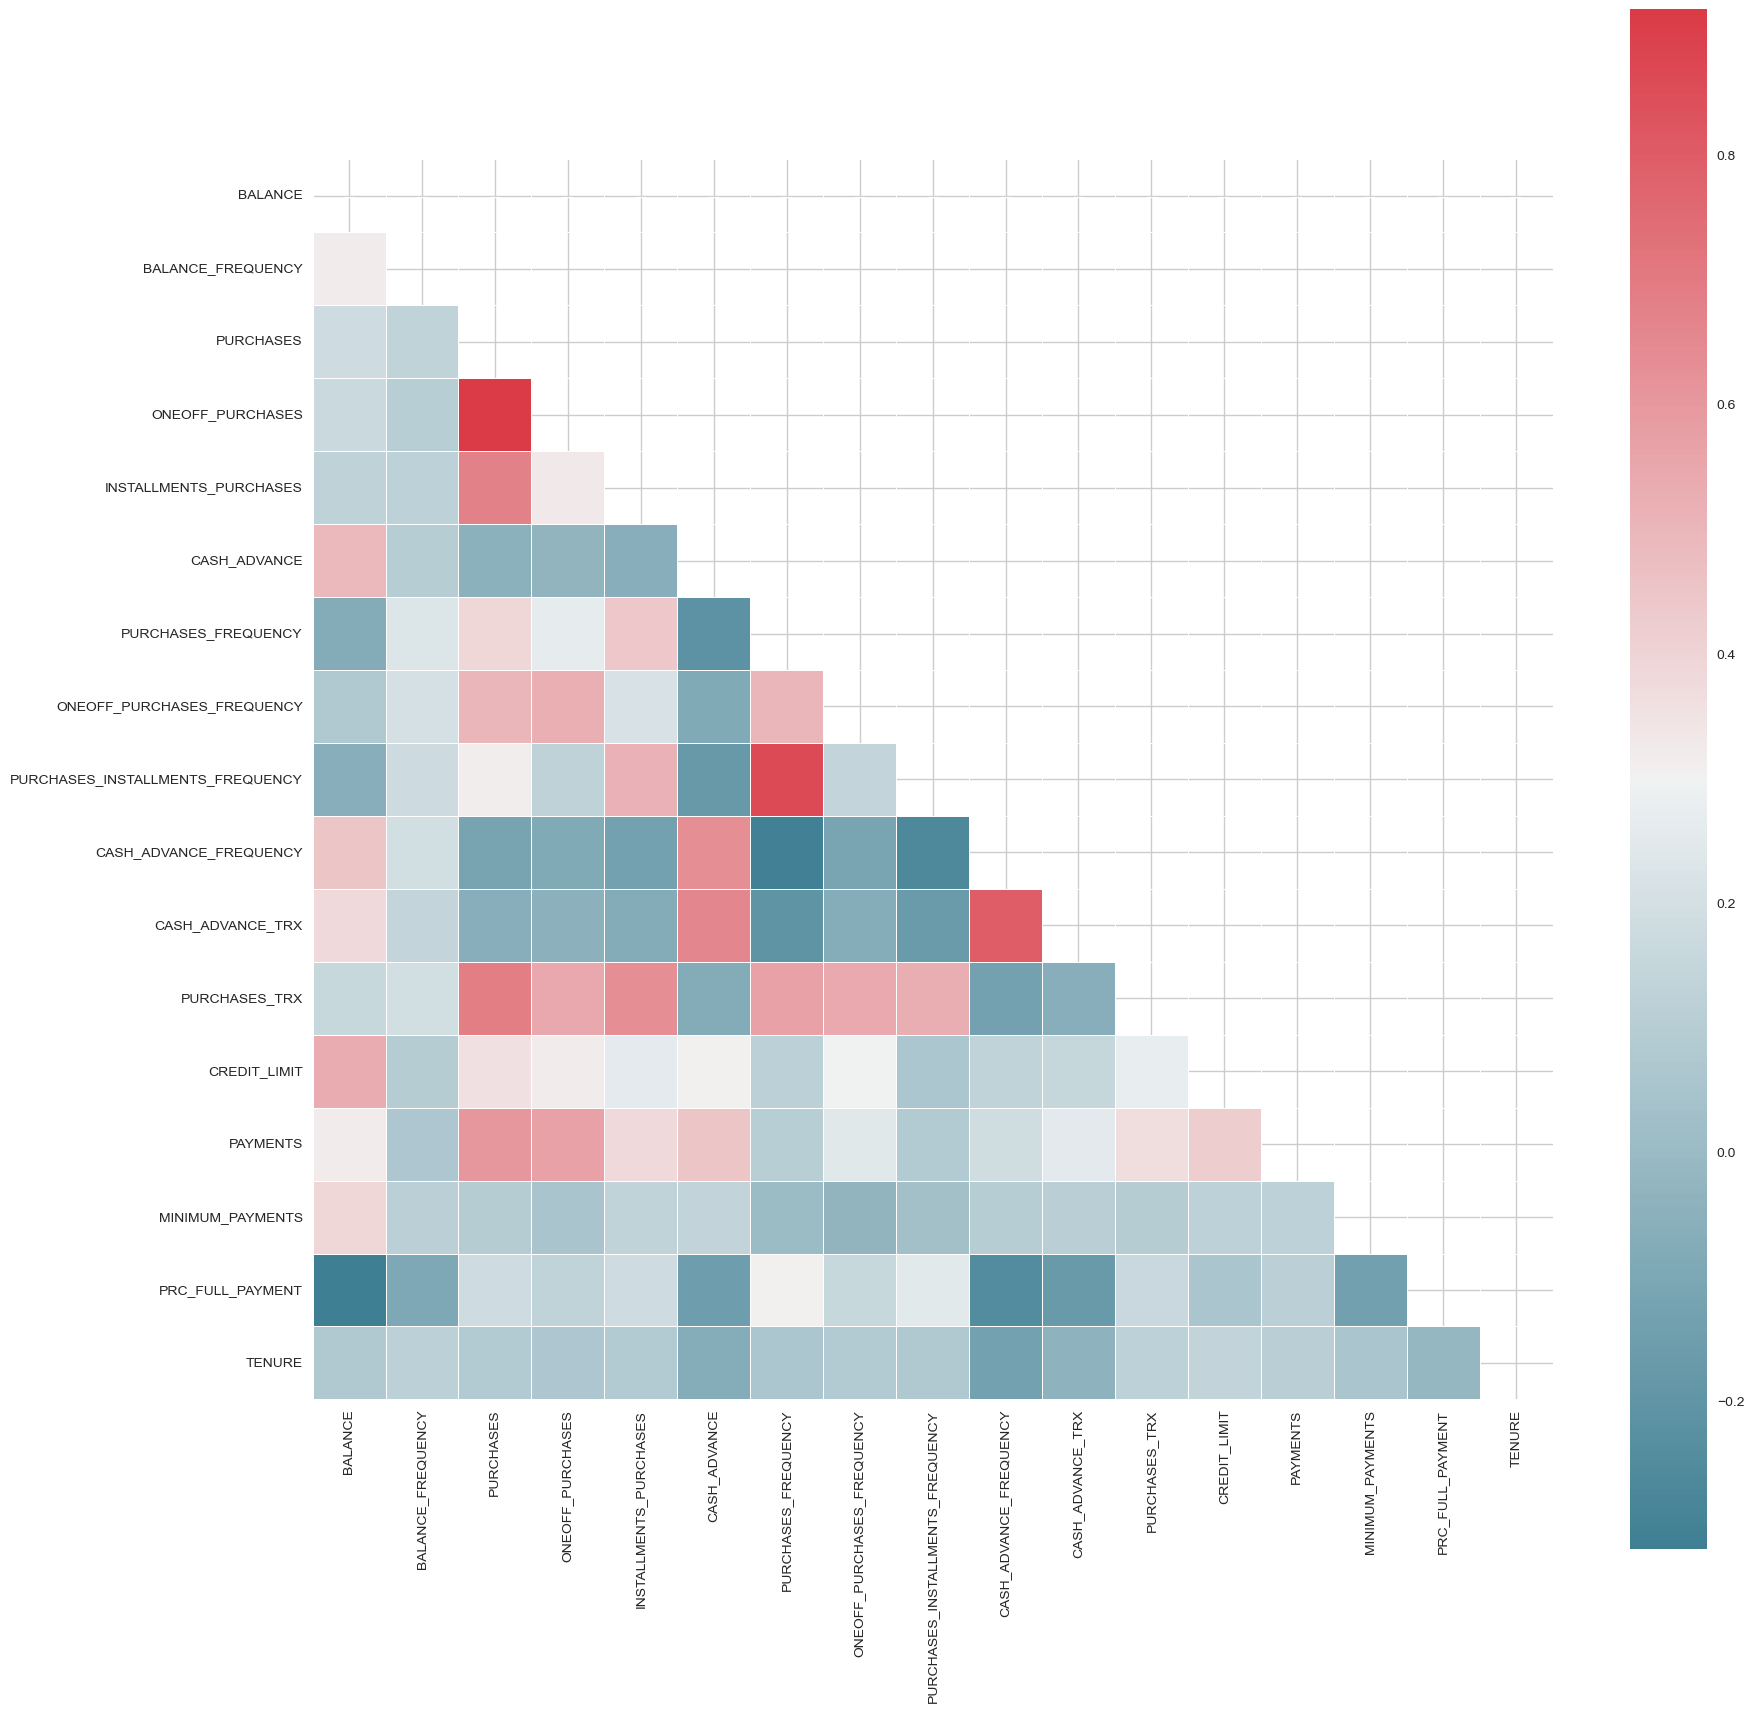

In [34]:
correlation = df.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(20, 20)

# generates a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype= bool))

# generates a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plots the heatmap
sns.heatmap(correlation, cmap=cmap, mask=mask, square=True, linewidths=.5, 
            annot=True, annot_kws={'size':14})

# displays the plot
plt.show()

From dataset report and correlation matrix, it can be concluded that:
- There are missing values in CREDIT_LIMIT (1 missing value) and MINIMUM_PAYMENTS (313 missing values).

- Most columns have a massive number of 0 values. Moreover, most columns are highly right-skewed, as seen from the histograms and the comparison of mean and median values (the mean value are smaller than the median value).

- Some variables have moderate to high correlation values to other variables (>0.5 to 1). Examples of high correlation variables are PURCHASES and ONEOFF_PURCHASES, with a 0.92 correlation value. Another example is CASH_ADVANCE_TRX with CASH_ADVANCE_FREQUENCY with a 0.8 correlation value.

- When using a credit card, most credit card customers prefer 12 months tenure compared to other tenure options. This can be concluded that customers are more likely to repay credits in the long term with the consequence of a higher interest rate.

- When investigating the BALANCE column further, it seems that there are many credit cards with 0 balances. It is also supported with so many 0 purchase amounts in PURCHASE column. Based on those results, it can be assumed that some users are intentionally keeping the balance low in their account in order to get high credit limit, which affects to increase credit utilization ratio and the credit score.

- Most of credit card accounts have 1 score in BALANCE_FREQUENCY column, which indicates that most customers use credit card frequently. However, this is different from ONEOFF_PURCHASES and PURCHASES_INSTALLMENT_FREQUENCY, where the majority of customers do not use credit cards for one-time transactions or payments in installments.

---
# **Notice:**

### We can see 3 pairs of strong correlation:
* "PURCHASES" and "ONEOFF_PURCHASES" --> 0.92
* "PURCHASES_FREQUENCY" and "PURCHASES_INSTALLMENT_FREQUENCY" --> 0.86
* "CASH_ADVANCE_TRX" and "CASH_ADVANCE_FREQUENCY" --> 0.8

---

### Outlier Detection

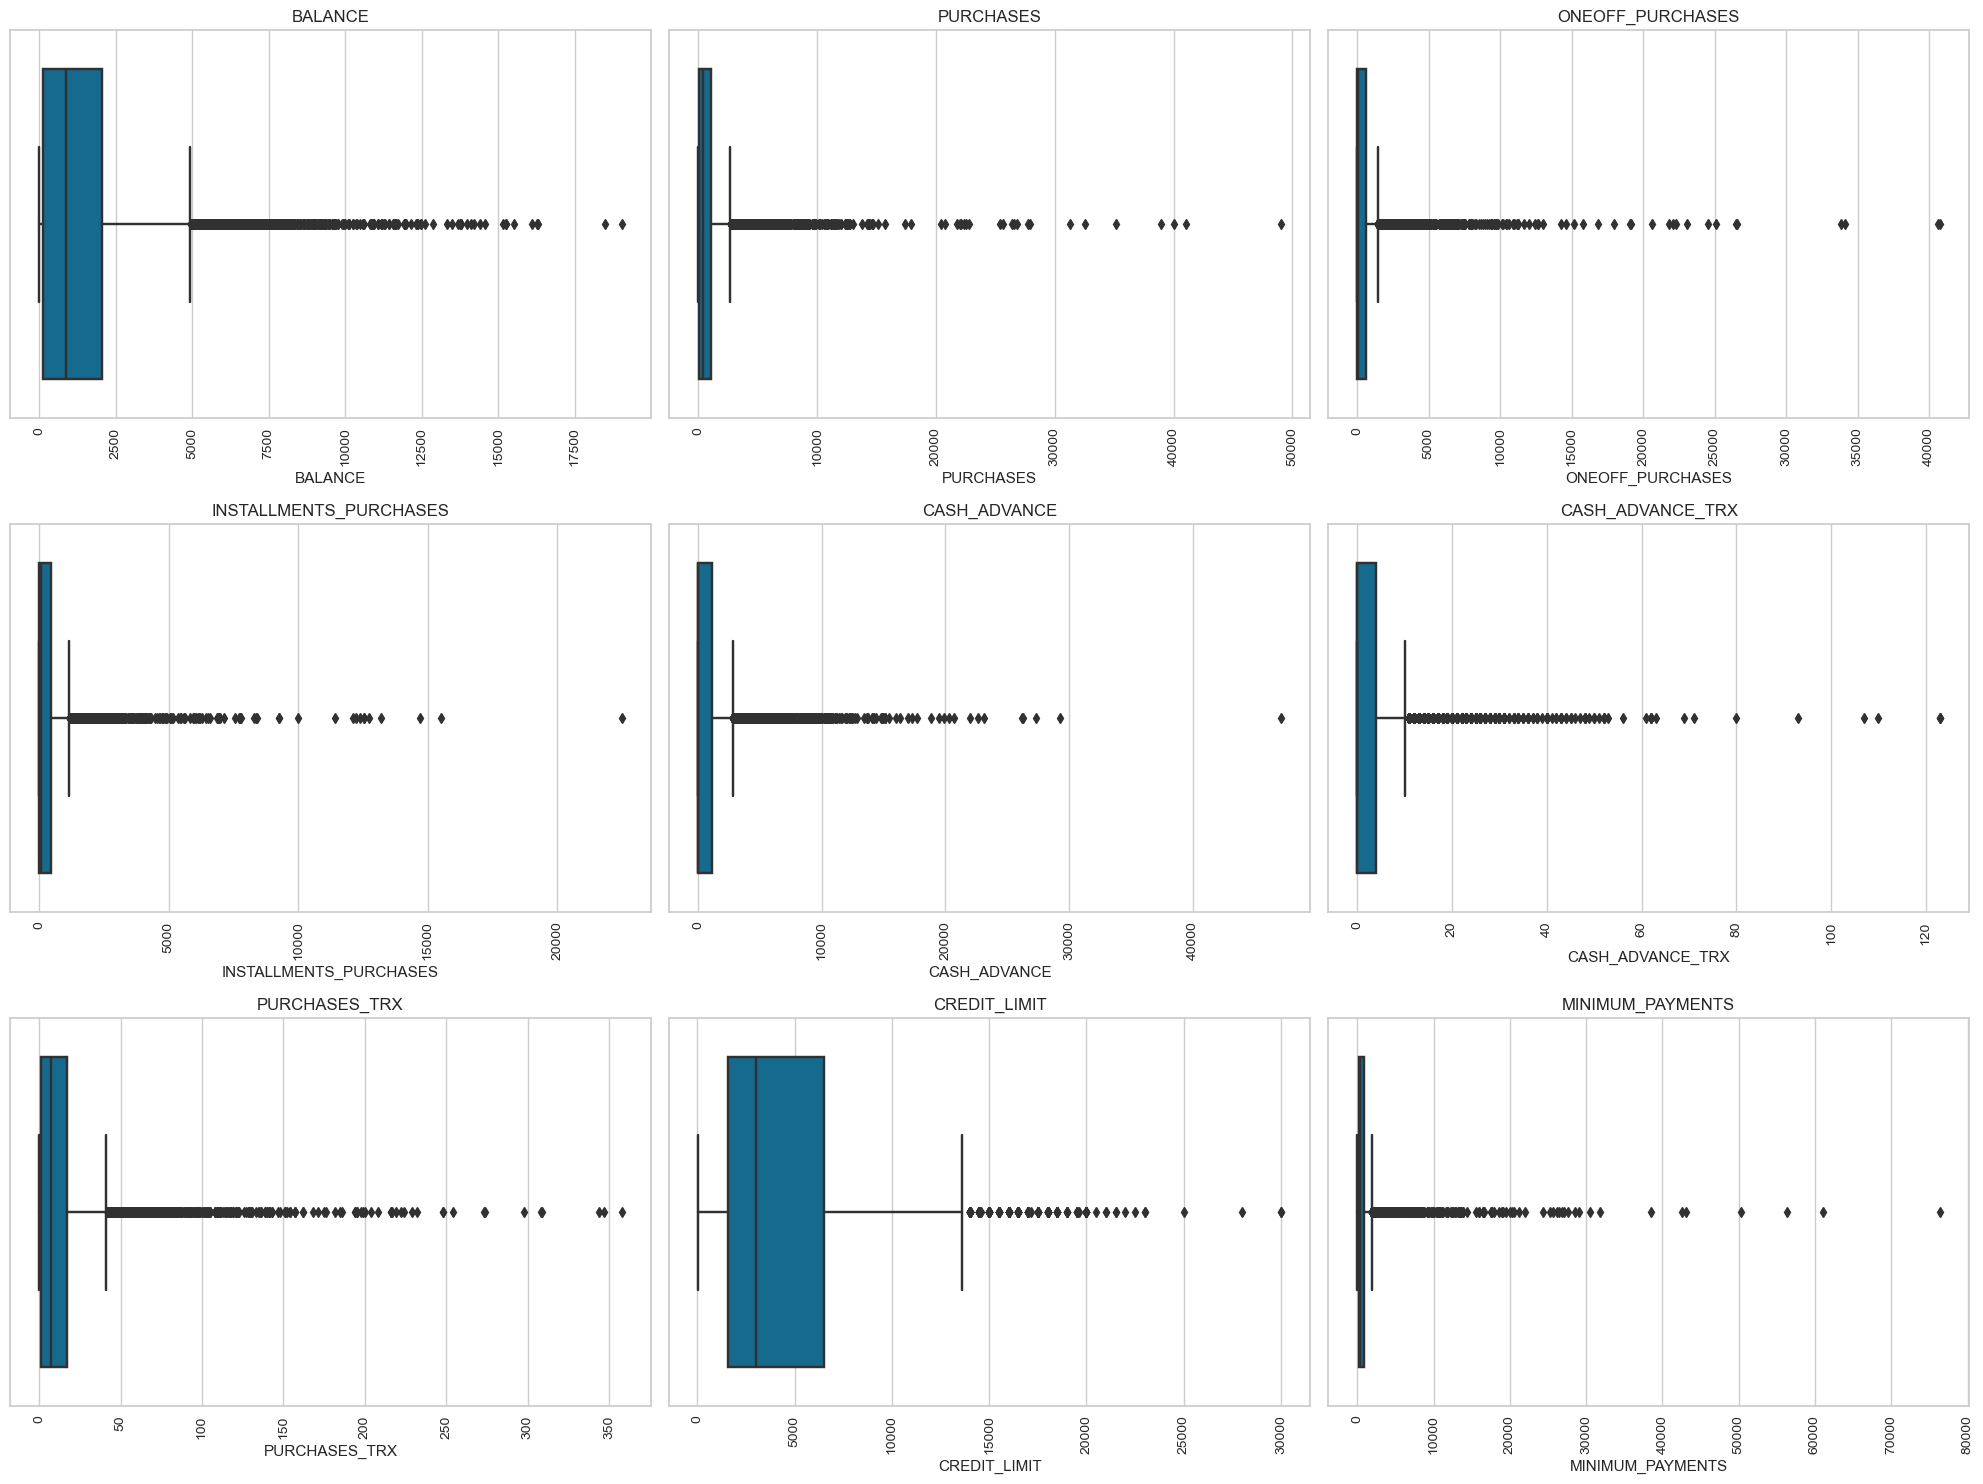

In [37]:

# Create a list of columns you want to include in the boxplot
columns = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
           'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT',
            'MINIMUM_PAYMENTS']


# Calculate the number of subplots needed
num_plots = len(columns)

# Calculate the number of rows and columns needed for subplots
num_cols = 3  # Default number of columns
num_rows = math.ceil(num_plots / num_cols)

# Adjust the number of columns if the last row has fewer than num_cols plots
if num_plots % num_cols == 1:
    num_cols = 2
elif num_plots % num_cols == 2:
    num_cols = 3

# Create subplots and plot boxplots for each selected column
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))
for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_title(col)
    axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_cols].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


Given the unique characteristics of the dataset, we have chosen to retain the outliers rather than removing them. We will explore various models that may be suitable for this dataset. Outliers are presumed innocent until proven guilty, so they should only be excluded if there is a legitimate reason.

### EDA 1 - Dumbbell Chart

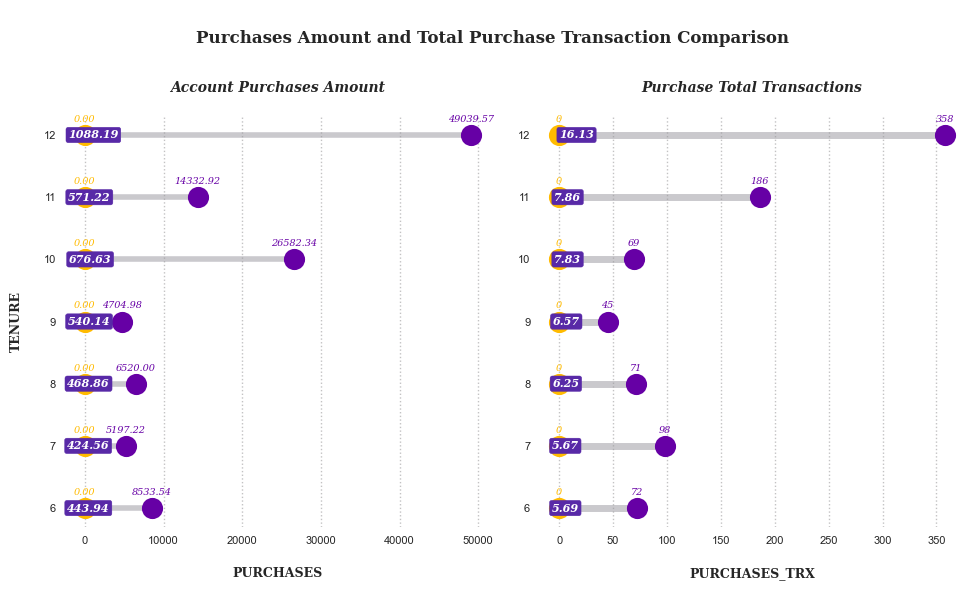

In [40]:
title=dict(fontsize=10, fontfamily='serif', style='italic', weight='bold', ha='center')
grid_style = dict(alpha=0.6, color='#9B9A9C', linestyle='dotted', zorder=1)
sct_style = dict(s=175, linewidth=2)
xy_label = dict(fontweight='bold', fontsize=9, fontfamily='serif')
ann_style = dict(xytext=(0, 0), textcoords='offset points', va='center', ha='center', style='italic', fontfamily='serif')
tenure = sorted(df['TENURE'].unique())
color_pallete = ['#2D0F51', '#FF9A00', '#6600A5', '#FFD61E', '#722E9A', '#FFE863', '#A486D5']

# --- EDA 1.1 Data Frame ---
eda1_1 = df[['PURCHASES', 'TENURE']]
eda1_1 = eda1_1.groupby('TENURE').agg(MIN=('PURCHASES', 'min'), AVG=('PURCHASES', 'mean'), MAX=('PURCHASES', 'max')).reset_index()

# --- EDA 1.2 Data Frame ---
eda1_2 = df[['PURCHASES_TRX', 'TENURE']]
eda1_2 = eda1_2.groupby('TENURE').agg(MIN=('PURCHASES_TRX', 'min'), AVG=('PURCHASES_TRX', 'mean'), MAX=('PURCHASES_TRX', 'max')).reset_index()

# --- EDA 1.1 & 1.2 Settings ---
fig = plt.figure(figsize=(10, 6))
plt.suptitle('\nPurchases Amount and Total Purchase Transaction Comparison', fontweight='heavy', fontsize=12, fontfamily='serif')

# --- EDA 1.1 (Left Dumbbell) ---
plt.subplot(1, 2, 1)
plt.tight_layout(rect=[0, 0, 1, 1.01])
axs_left=plt.gca()
min_sct = plt.scatter(x=eda1_1['MIN'], y=eda1_1['TENURE'], c='#FFBB00', **sct_style)
max_sct = plt.scatter(x=eda1_1['MAX'], y=eda1_1['TENURE'], c='#6600A5', **sct_style)
for i in range(len(tenure)):
    eda1_1_x = eda1_1[eda1_1['TENURE']==tenure[i]]
    plt.hlines(y=eda1_1_x['TENURE'], xmin=eda1_1_x['MIN'], xmax=eda1_1_x['MAX'], linewidth=4, color='#CAC9CD', zorder=0)
    plt.annotate('{0:.2f}'.format(eda1_1_x['MIN'].values[0]), xy=(eda1_1_x['MIN'].values[0], eda1_1_x['TENURE'].values[0]+0.25), color='#FFBB00', fontsize=7, **ann_style)
    plt.annotate('{0:.2f}'.format(eda1_1_x['AVG'].values[0]), xy=(eda1_1_x['AVG'].values[0], eda1_1_x['TENURE'].values[0]), color='w', fontsize=8, fontweight='bold', bbox=dict(boxstyle='round', pad=0.2, color='#5829A7'), **ann_style)
    plt.annotate('{0:.2f}'.format(eda1_1_x['MAX'].values[0]), xy=(eda1_1_x['MAX'].values[0], eda1_1_x['TENURE'].values[0]+0.25), color='#6600A5', fontsize=7, **ann_style)
for spine in axs_left.spines.values():
    spine.set_color('None')
plt.xlabel('\nPURCHASES', **xy_label)
plt.ylabel('TENURE\n', **xy_label)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', alpha=0)
plt.grid(axis='x', which='major', **grid_style)
plt.title('\nAccount Purchases Amount\n', **title)

# --- EDA 1.2 (Right Dumbbell)
plt.subplot(1, 2, 2)
plt.tight_layout(rect=[0, 0, 1, 1.01])
axs_right=plt.gca()
min_sctt = plt.scatter(x=eda1_2['MIN'], y=eda1_2['TENURE'], c='#FFBB00', **sct_style)
max_sctt = plt.scatter(x=eda1_2['MAX'], y=eda1_2['TENURE'], c='#6600A5', **sct_style)
for i in range(len(tenure)):
    eda1_2_x = eda1_2[eda1_2['TENURE']==tenure[i]]
    plt.hlines(y=eda1_2_x['TENURE'], xmin=eda1_2_x['MIN'], xmax=eda1_2_x['MAX'], linewidth=5, color='#CAC9CD', zorder=0)
    plt.annotate('{:.0f}'.format(eda1_2_x['MIN'].values[0]), xy=(eda1_2_x['MIN'].values[0], eda1_2_x['TENURE'].values[0]+0.25), color='#FFBB00', fontsize=7, **ann_style)
    plt.annotate('{0:.2f}'.format(eda1_2_x['AVG'].values[0]), xy=(eda1_2_x['AVG'].values[0], eda1_2_x['TENURE'].values[0]), color='w', fontsize=8, fontweight='bold', bbox=dict(boxstyle='round', pad=0.2, color='#5829A7'), **ann_style)
    plt.annotate('{:.0f}'.format(eda1_2_x['MAX'].values[0]), xy=(eda1_2_x['MAX'].values[0], eda1_2_x['TENURE'].values[0]+0.25), color='#6600A5', fontsize=7, **ann_style)
for spine in axs_right.spines.values():
    spine.set_color('None')
plt.xlabel('\nPURCHASES_TRX', **xy_label)
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', alpha=0)
plt.grid(axis='x', which='major', **grid_style)
plt.title('\nPurchase Total Transactions\n', **title)

plt.show();

Based on the provided dumbbell chart, it is evident that credit card users who have been with the company for 12 months are more inclined to make larger buy amounts and have a higher number of total purchase transactions compared to consumers with different tenure periods. This pertains to the preceding subject matter, when clients exhibit a higher propensity to repay debts over an extended duration, with the intention of augmenting the interest rate. In addition, certain customers intentionally refrain from making any transactions whatsoever, resulting in zero purchases and transactions. This strategy is employed to obtain a higher credit limit, hence influencing the increase in credit scores and credit utilisation ratios.

The graph above indicates that customers with a tenure of 10 months exhibit a greater purchase quantity compared to consumers with a tenure of 11 months. However, there is an inverse relationship between total transactions and customer longevity. Specifically, consumers with a tenure of ten months have fewer transactions compared to customers with a tenure of eleven months. Another instance is when a customer who has been with the company for seven months has a lesser purchase amount compared to a customer who has been with the company for eight months. Conversely, the total number of transactions made by customers with a seven-month tenure is more than that of consumers with an eight-month tenure.

### EDA 2 - Scatter Plot showing Credit Limit vs Balance based on Tenure

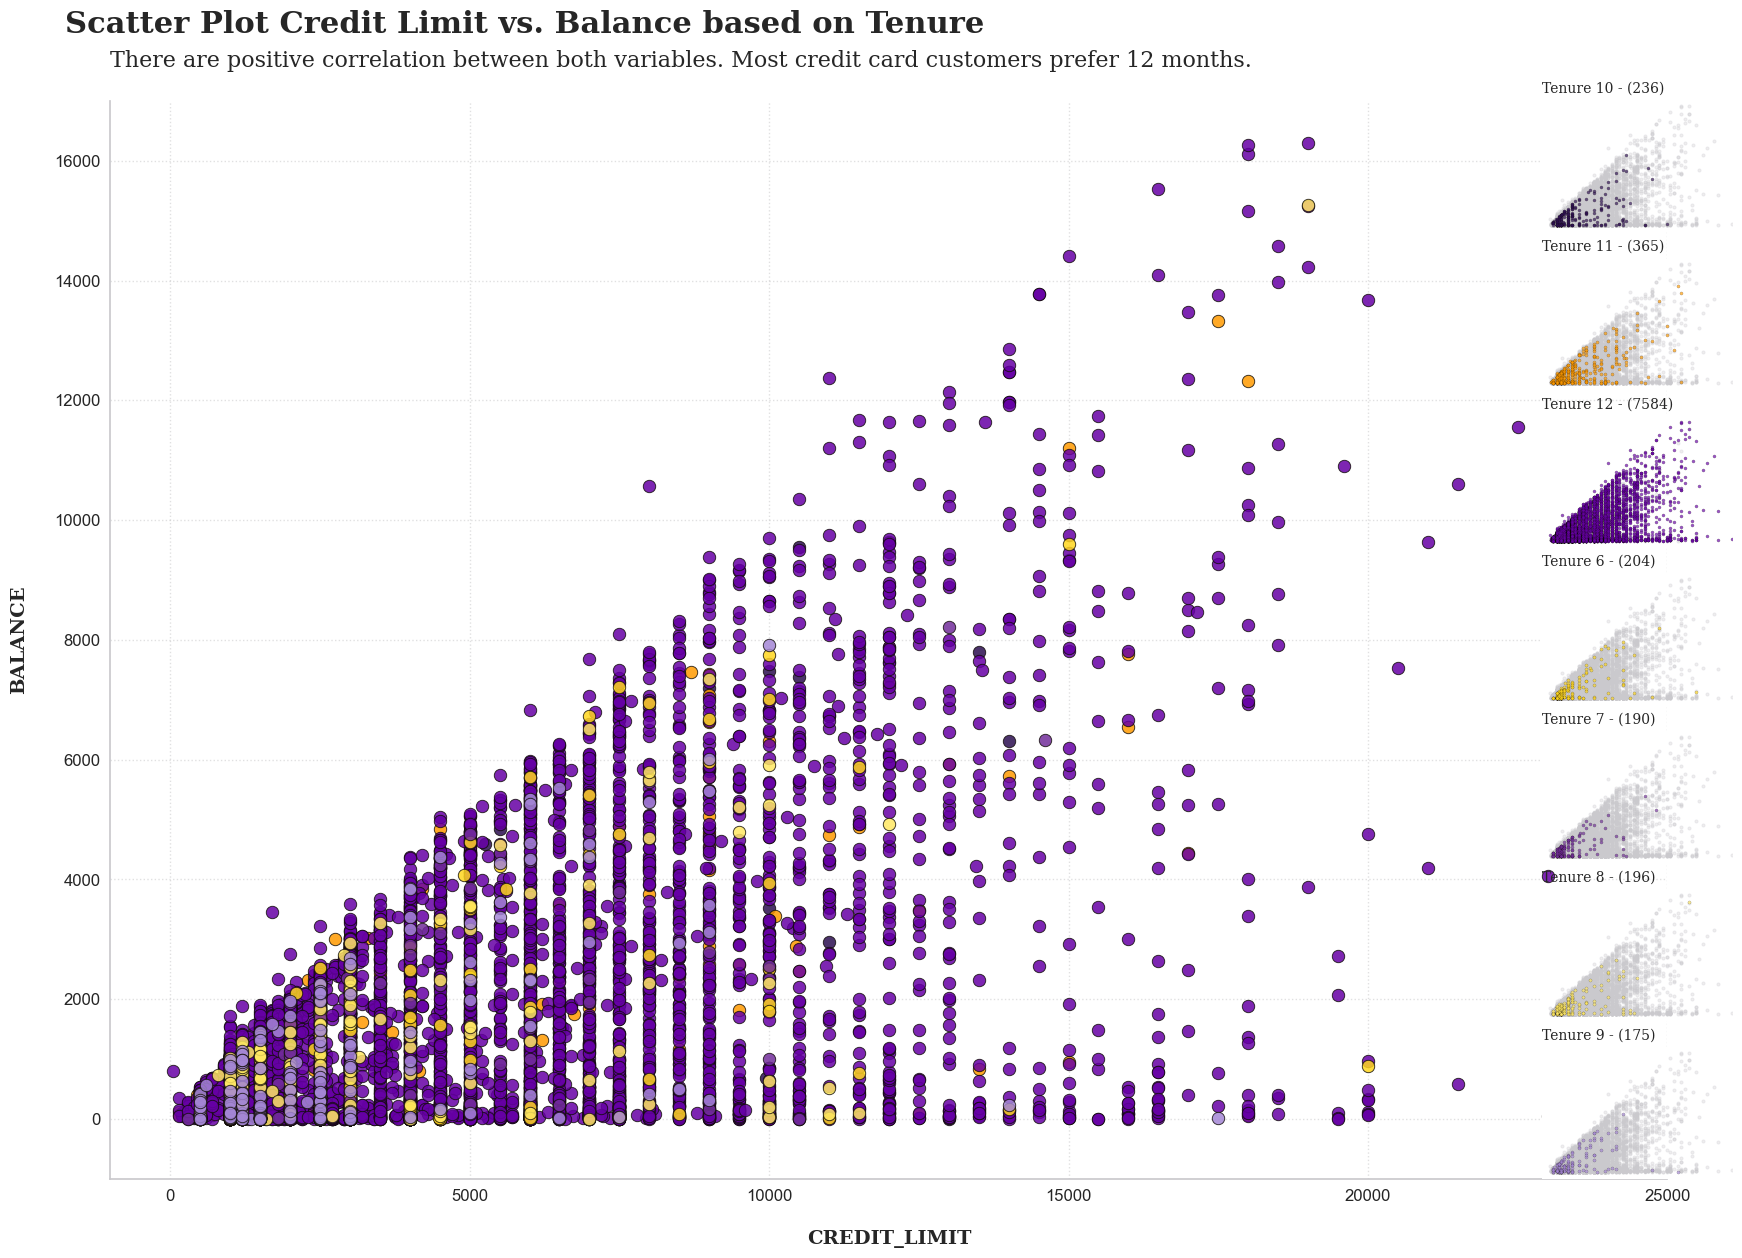

In [43]:
# --- EDA 2 Variables ---
scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
sub_scatter_style_color=dict(s=5, alpha=0.65, linewidth=0.15, zorder=10, edgecolor='#100C07')
sub_scatter_style_grey=dict(s=5, alpha=0.3, linewidth=0.7, zorder=5, color='#CAC9CD')
grid_style=dict(alpha=0.3, color='#9B9A9C', linestyle='dotted', zorder=1)
xy_label=dict(fontweight='bold', fontsize=14, fontfamily='serif')
suptitle=dict(fontsize=22, fontweight='heavy', fontfamily='serif')
title=dict(fontsize=16, fontfamily='serif')
color_pallete=['#2D0F51', '#FF9A00', '#6600A5', '#FFD61E', '#722E9A', '#FFE863', '#A486D5']
sub_axes=[None] * 7

# --- EDA 2 Data Frame ---
eda2 = df[['CREDIT_LIMIT', 'BALANCE', 'TENURE']]
eda2['TENURE'] = eda2['TENURE'].astype(str)
tenure = sorted(eda2['TENURE'].unique())

# --- EDA 2 Settings ---
fig = plt.figure(figsize=(22, 14))
gs = fig.add_gridspec(7, 7)
ax = fig.add_subplot(gs[:, :7])
ax.set_aspect(1)

# --- EDA 2: Main Scatter Plot ---
for x in range(len(tenure)):
    eda2_x = eda2[eda2['TENURE']==tenure[x]]
    ax.scatter(eda2_x['CREDIT_LIMIT'], eda2_x['BALANCE'], s=80, color=color_pallete[x], **scatter_style)
    ax.set_title('There are positive correlation between both variables. Most credit card customers prefer 12 months.\n', loc='left', **title)
    ax.set_xlabel('\nCREDIT_LIMIT', **xy_label)
    ax.set_ylabel('BALANCE\n', **xy_label)
    ax.grid(axis='y', which='major', **grid_style)
    ax.grid(axis='x', which='major', **grid_style)
    for spine in ax.spines.values():
        spine.set_color('None')
    for spine in ['bottom', 'left']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_color('#CAC9CD')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

# --- EDA 2: Sub Plots ---
for idx, tnr in enumerate(tenure):
    sub_axes[idx] = fig.add_subplot(gs[idx, 6], aspect=1)
    
    sub_axes[idx].scatter(eda2[eda2['TENURE']!=tnr]['CREDIT_LIMIT'], eda2[eda2['TENURE']!=tnr]['BALANCE'], label=tnr, **sub_scatter_style_grey)
    sub_axes[idx].scatter(eda2[eda2['TENURE']==tnr]['CREDIT_LIMIT'], eda2[eda2['TENURE']==tnr]['BALANCE'], color=color_pallete[idx], label=tnr, **sub_scatter_style_color)
    
    cnt = (eda2['TENURE']==tnr).sum()
    sub_axes[idx].set_title(f'Tenure {tnr} - ({cnt})', loc='left', fontsize=10, fontfamily='serif')
    sub_axes[idx].set_xticks([])
    sub_axes[idx].set_yticks([])
    for spine in sub_axes[idx].spines.values():
        spine.set_color('None')

# --- EDA 2 XY Limit ---
for axes in [ax] + sub_axes:
    axes.set_xlim(-1000, 25000)
    axes.set_ylim(-1000, 17000)

# --- EDA 2 Title ---
plt.suptitle('Scatter Plot Credit Limit vs. Balance based on Tenure', x=0.138, y=0.945, ha='left', **suptitle)
plt.show();

### EDA 3 - Scatter Plot showing Credit Limit vs Installment Purhases based on Tenure

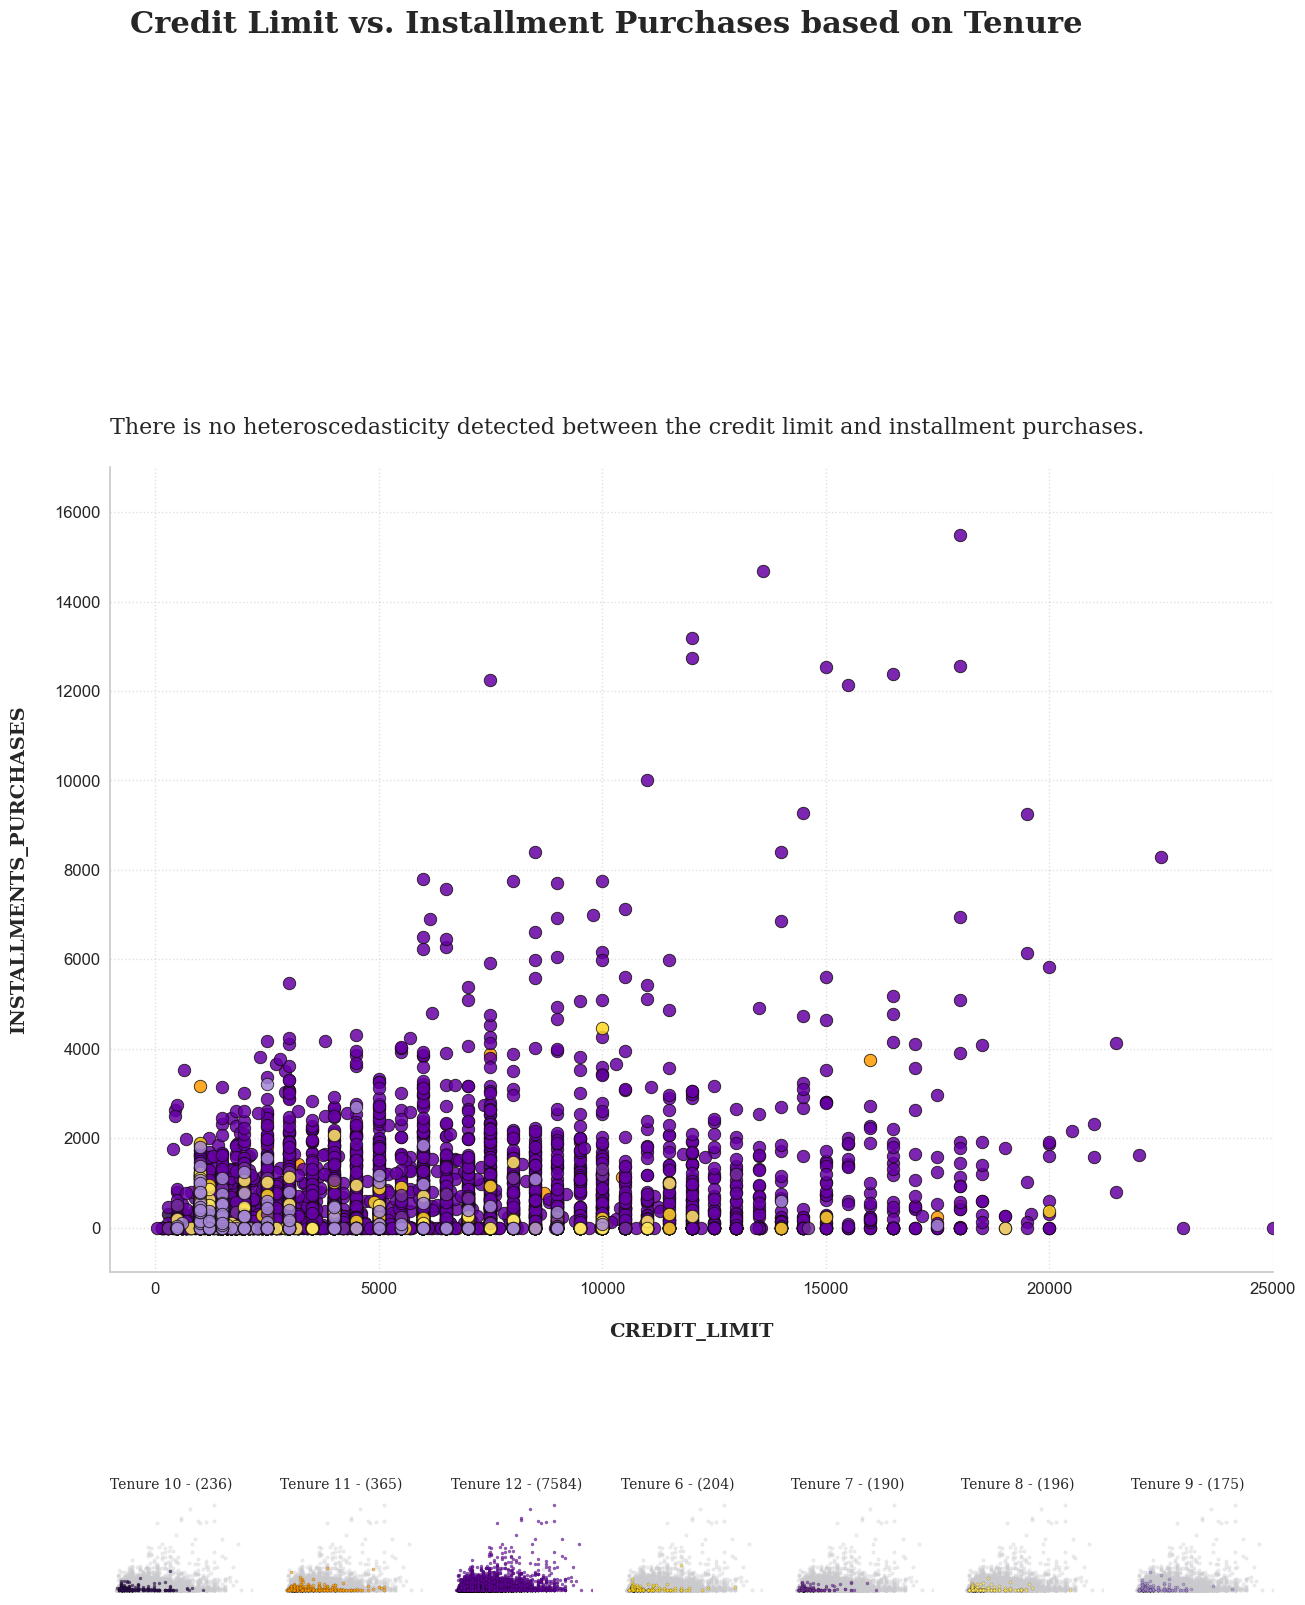

In [45]:
# --- EDA 3 Variables ---
scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
sub_scatter_style_color=dict(s=5, alpha=0.65, linewidth=0.15, zorder=10, edgecolor='#100C07')
sub_scatter_style_grey=dict(s=5, alpha=0.3, linewidth=0.7, zorder=5, color='#CAC9CD')
grid_style=dict(alpha=0.3, color='#9B9A9C', linestyle='dotted', zorder=1)
xy_label=dict(fontweight='bold', fontsize=14, fontfamily='serif')
suptitle=dict(fontsize=22, fontweight='heavy', fontfamily='serif')
title=dict(fontsize=16, fontfamily='serif')
color_pallete=['#2D0F51', '#FF9A00', '#6600A5', '#FFD61E', '#722E9A', '#FFE863', '#A486D5']
sub_axes=[None] * 7

# --- EDA 3 Data Frame ---
eda3 = df[['CREDIT_LIMIT', 'INSTALLMENTS_PURCHASES', 'TENURE']]
eda3['TENURE'] = eda2['TENURE'].astype(str)
tenure = sorted(eda2['TENURE'].unique())

# --- EDA 3 Settings ---
fig = plt.figure(figsize=(15, 20))
gs = fig.add_gridspec(7, 7)
ax = fig.add_subplot(gs[:7, :])
ax.set_aspect(1)

# --- EDA 3: Main Scatter Plot ---
for x in range(len(tenure)):
    eda3_x = eda3[eda3['TENURE']==tenure[x]]
    ax.scatter(eda3_x['CREDIT_LIMIT'], eda3_x['INSTALLMENTS_PURCHASES'], s=80, color=color_pallete[x], **scatter_style)
    ax.set_title('There is no heteroscedasticity detected between the credit limit and installment purchases.\n', loc='left', **title)
    ax.set_xlabel('\nCREDIT_LIMIT', **xy_label)
    ax.set_ylabel('INSTALLMENTS_PURCHASES\n', **xy_label)
    ax.grid(axis='y', which='major', **grid_style)
    ax.grid(axis='x', which='major', **grid_style)
    for spine in ax.spines.values():
        spine.set_color('None')
    for spine in ['bottom', 'left']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_color('#CAC9CD')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

# --- EDA 3: Sub Plots ---
for idx, tnr in enumerate(tenure):
    sub_axes[idx] = fig.add_subplot(gs[6, idx], aspect=1)
    
    sub_axes[idx].scatter(eda3[eda3['TENURE']!=tnr]['CREDIT_LIMIT'], eda3[eda3['TENURE']!=tnr]['INSTALLMENTS_PURCHASES'], label=tnr, **sub_scatter_style_grey)
    sub_axes[idx].scatter(eda3[eda3['TENURE']==tnr]['CREDIT_LIMIT'], eda3[eda3['TENURE']==tnr]['INSTALLMENTS_PURCHASES'], color=color_pallete[idx], label=tnr, **sub_scatter_style_color)
    
    cnt = (eda3['TENURE']==tnr).sum()
    sub_axes[idx].set_title(f'Tenure {tnr} - ({cnt})', loc='left', fontsize=10, fontfamily='serif')
    sub_axes[idx].set_xticks([])
    sub_axes[idx].set_yticks([])
    for spine in sub_axes[idx].spines.values():
        spine.set_color('None')

# --- EDA 3 XY Limit ---
for axes in [ax] + sub_axes:
    axes.set_xlim(-1000, 25000)
    axes.set_ylim(-1000, 17000)

# --- EDA 3 Title ---
plt.suptitle('Credit Limit vs. Installment Purchases based on Tenure', x=0.138, y=0.925, ha='left', **suptitle)
plt.show();

The scatter plot shows no correlation between both variables since the scatter plot shows a random pattern

## **Univariate Analysis**

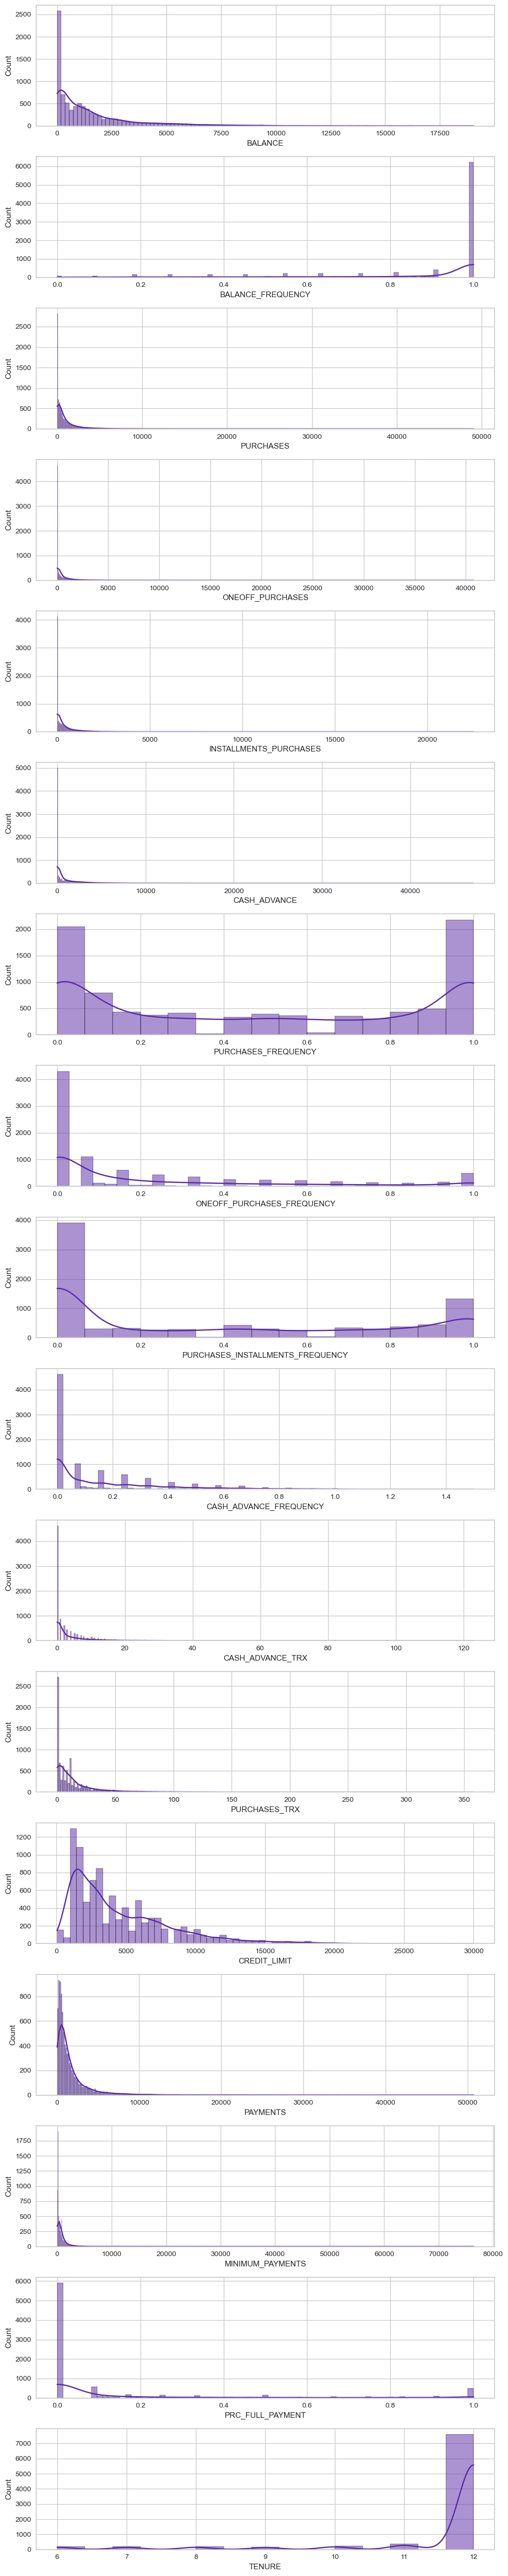

In [48]:
# creating distribution plot for analysis
    
fig, ax = plt.subplots(17,1,figsize=(10,50))
for i, col in enumerate(df):
    sns.histplot(df[col], kde=True, ax=ax[i], color='#5829A7')
fig.tight_layout()
plt.show()

## Scaling 📐

Since clustering methods use distance metrics I will create a scaled copy of the data.

In [51]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df)

# **IMPLEMENTATION OF UNSUPERVISED/CLUSTERING ML MODELS/ALGORITHMS**
---

<img src="HOW BLOCKCHAIN IS CHANGING BANKING INDUSTRY_.gif">

## **Principal Component Analysis (PCA)**

**Principal component analysis (PCA)** is a method used in unsupervised machine learning (such as clustering) that **reduces high-dimension data to smaller dimensions while preserving as much information as possible**. By using PCA before applying clustering algorithm, it allows to **reduces dimensions, data noise, and decrease computation cost**. In this notebook, the number of features will be reduced to 10 dimensions so that the clustering results can be visualized.

In [56]:
def apply_pca(X, n_components= 8, random_state=None):

    pca = PCA(n_components=n_components, random_state=random_state)
    return pca.fit_transform(X)

# Transform into Array
X = np.asarray(X)

# Applying PCA
X = apply_pca(X, n_components=8, random_state=36)


## **1. Hierarchical Clustering (Agglomerative)**

Hierarchical clustering operates by organizing data into a tree structure of clusters. Initially, each data point is treated as an individual cluster. Subsequently, pairs of the most similar clusters are iteratively identified and merged until all clusters are consolidated. The aim in hierarchical clustering is to construct a nested hierarchy of clusters. Dendrograms serve as visual aids to track the clustering process and determine the optimal number of clusters. To identify this number, we analyze dendrograms by locating the greatest vertical distance without intersecting other clusters and draw horizontal lines at both ends. The optimal cluster count corresponds to the number of vertical lines intersecting the horizontal line. For instance, in the given example, the optimal cluster count is four. 


<br>
<center>
<img src="https://miro.medium.com/max/1198/1*VvOVxdBb74IOxxF2RmthCQ.png" alt="Dendogram" width="35%"> <img src="https://miro.medium.com/max/1100/1*guOwD01bko5ITVIJWQdIPQ.png" alt="Clustering" width="23%"><br>
<i style="font-size: 10px;"> Dendogram and Hierarchical Clustering Result Sample </i>
</center>
</blockquote>


The next step involves generating a dendrogram, drawing a horizontal line between the identified points, and subsequently evaluating the dendrogram while comparing the results with the Distortion Elbow Score.

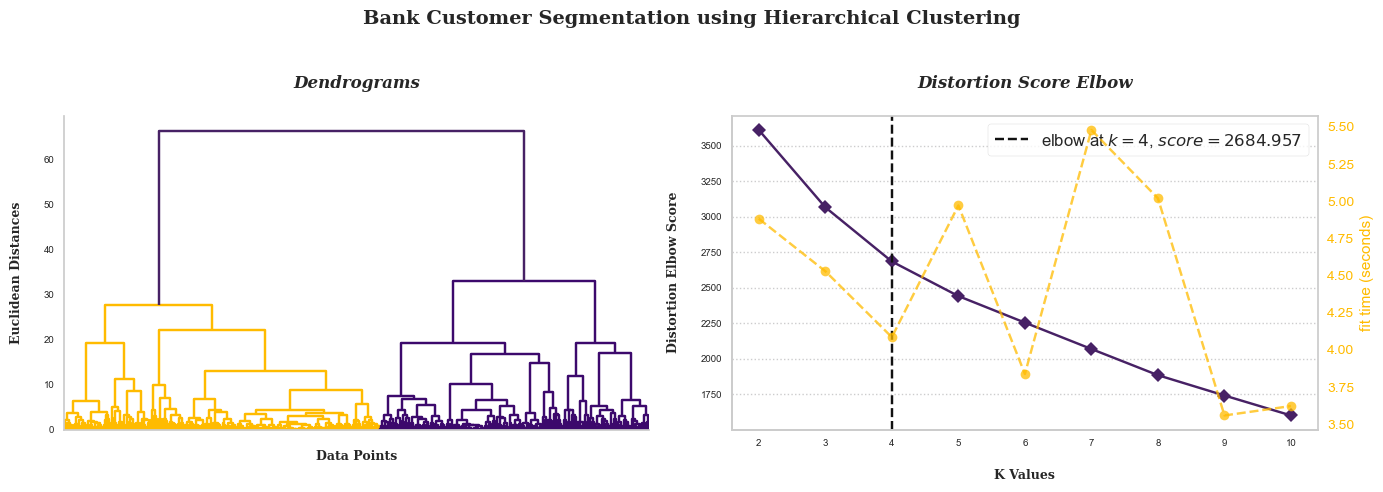

In [59]:
def plot_dendrogram(X):
    # Figure Settings
    sns.set_palette(['#472165', '#FFBB00', '#3C096C', '#9D4EDD', '#FFE270'])
    text_style = dict(fontweight='bold', fontfamily='serif')
    ann = dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    title = dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    bbox = dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Dendrogram Plot
    dend = shc.dendrogram(shc.linkage(X, method='ward', metric='euclidean'), ax=ax1)
    ax1.axhline(y=115, color='#3E3B39', linestyle='--')
    ax1.set_xlabel('\nData Points', fontsize=9, **text_style)
    ax1.set_ylabel('Euclidean Distances\n', fontsize=9, **text_style)
    ax1.annotate('Horizontal Cut Line', xy=(15000, 130), xytext=(1, 1), fontsize=8, bbox=bbox, **ann)
    ax1.tick_params(labelbottom=False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.grid(axis='both', alpha=0)
    ax1.tick_params(labelsize=7)
    ax1.set_title('Dendrograms\n', **title)
    
    
   
    # Elbow Score (Distortion Score)
    elbow_score_ch = KElbowVisualizer(AgglomerativeClustering(), metric='distortion', ax=ax2)
    elbow_score_ch.fit(X)
    elbow_score_ch.finalize()
    elbow_score_ch.ax.set_title('Distortion Score Elbow\n', **title)
    elbow_score_ch.ax.tick_params(labelsize=7)
    elbow_score_ch.ax.spines['top'].set_visible(False)
    elbow_score_ch.ax.spines['right'].set_visible(False)
    elbow_score_ch.ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    elbow_score_ch.ax.grid(axis='x', alpha=0)
    elbow_score_ch.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    elbow_score_ch.ax.set_ylabel('Distortion Elbow Score\n', fontsize=9, **text_style)
    
    
    plt.suptitle('Bank Customer Segmentation using Hierarchical Clustering\n', fontsize=14, **text_style)
    plt.tight_layout()
    plt.show()

# Calling Dendrogram Function

plot_dendrogram(X)

Following the examination of the dendrogram, it is determined that the optimal cluster number is two, as indicated by the tallest vertical line positioned at the initial branch of the dendrogram (on the left side of the image), intersecting the threshold line and dividing the dendrogram into two segments. Additionally, the Distorton Elbow score further has an optimal cluster count of four.

Subsequently, we will apply this Elbow score cluster count in the agglomerative clustering algorithm and proceed to visualize and assess the resultant clusters.

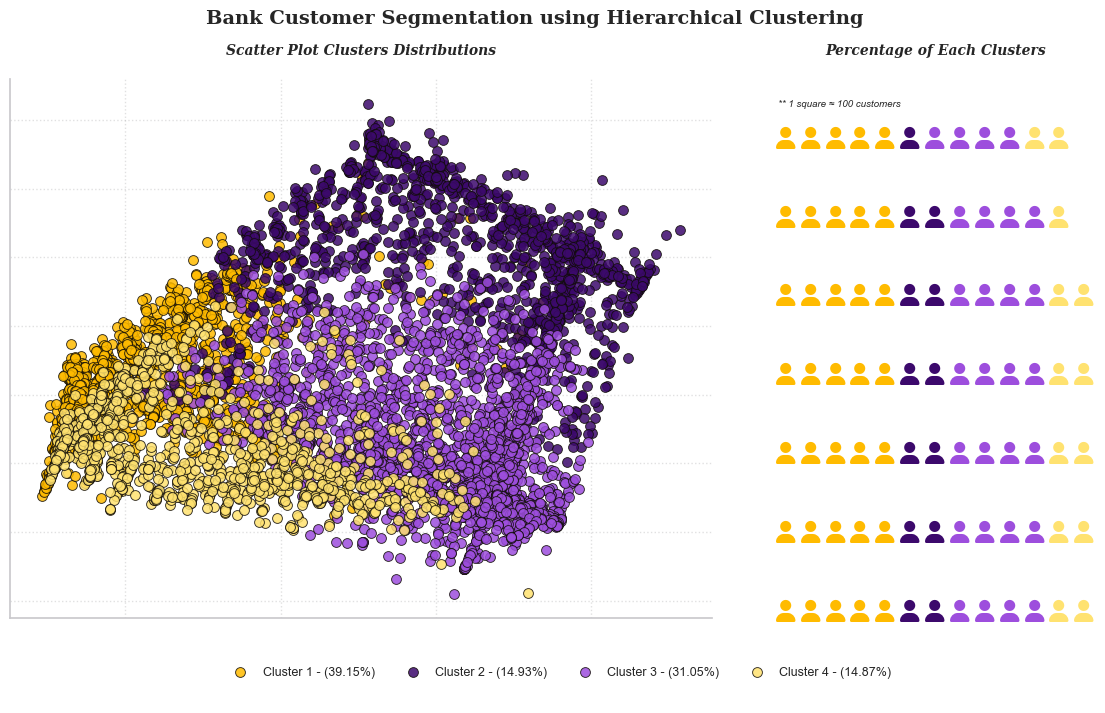

In [61]:
from pywaffle import Waffle 

def hierarchical_clustering(X):
    agg_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
    y_agg_cluster = agg_cluster.fit_predict(X)
    return agg_cluster, y_agg_cluster

def visualize_hierarchical_clustering(agg_cluster, y_agg_cluster):
    # Figures Settings
    cluster_colors = ['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
    labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
    suptitle = dict(fontsize=14, fontweight='heavy', fontfamily='serif')
    title = dict(fontsize=10, fontweight='bold', style='italic', fontfamily='serif')
    scatter_style = dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
    legend_style = dict(borderpad=2, frameon=False, fontsize=9)
    fig = plt.figure(figsize=(14, 7))
    
    # Percentage Labels
    unique, counts = np.unique(y_agg_cluster, return_counts=True)
    df_waffle = dict(zip(unique, counts))
    total = sum(df_waffle.values())
    wfl_square = {key: value/100 for key, value in df_waffle.items()}
    wfl_label = {key: round(value/total*100, 2) for key, value in df_waffle.items()}

    # Clusters Distribution
    y_agg_labels = list(set(y_agg_cluster.tolist()))
    ax1 = fig.add_subplot(1, 3, (1, 2))
    for i in y_agg_labels:
        ax1.scatter(X[y_agg_cluster==i, 0], X[y_agg_cluster == i, 1], s=50, c=cluster_colors[i], label=labels[i], **scatter_style)
    for spine in ax1.spines.values():
        spine.set_color('None')
    for spine in ['bottom', 'left']:
        ax1.spines[spine].set_visible(True)
        ax1.spines[spine].set_color('#CAC9CD')
    ax1.legend([f"Cluster {i+1} - ({k}%)" for i, k in wfl_label.items()], bbox_to_anchor=(1.3, -0.03), ncol=4, **legend_style)
    ax1.grid(axis='both', alpha=0.3, color='#9B9A9C', linestyle='dotted')
    ax1.tick_params(left=False, right=False , labelleft=False , labelbottom=False, bottom=False)
    plt.title('Scatter Plot Clusters Distributions\n', **title)
    
    # Waffle Chart
    ax2 = fig.add_subplot(1, 3, 3)
    ax2.set_title('Percentage of Each Clusters\n', **title)
    ax2.set_aspect(aspect='auto')
    Waffle.make_waffle(ax=ax2, rows=7, values=wfl_square, colors=cluster_colors, icons='user', icon_size=16)
    ax2.get_legend().remove()
    ax2.text(0.01, 0.95, '** 1 square ≈ 100 customers', style='italic', fontsize=7)
    
    plt.suptitle('Bank Customer Segmentation using Hierarchical Clustering\n', **suptitle)
    plt.show()

# --- Calling Hierarchical Clustering Functions ---
agg_cluster, y_agg_cluster = hierarchical_clustering(X)
visualize_hierarchical_clustering(agg_cluster, y_agg_cluster)

The implementation of hierarchical clustering reveals the emergence of four distinctive clusters. Within these clusters, cluster 1 boasts the highest concentration of data points, closely trailed by cluster 3. It becomes evident that cluster 1 in the hierarchical model encompasses a more substantial portion of the dataset.

The subsequent step involves assessing the quality of clustering offered by hierarchical clustering. This evaluation entails the utilization of metrics such as the silhouette score and Davies-Bouldin index to ascertain the efficacy of the clustering methodology.

The subsequent phase involves assessing the clustering effectiveness facilitated by Hierarchical Clustering. This evaluation will utilize the Davies-Bouldin index, silhouette score, and Calinski-Harabasz index:
- The   Davies-Bouldin Index serves as a measure for appraising clustering algorithms, calculated as the ratio between cluster scatter and separation. Scores vary from 0 upwards, with 0 indicating superior clustering. 
- The Silhouette Coefficient, a metric utilized to gauge the efficacy of clustering techniques, ranges from -1 to 1. A higher score signifies better performance, with 1 denoting well-separated and distinct clusters, 0 suggesting indifference among clusters or insignificant inter-cluster distance, and -1 indicating erroneous cluster assignments.
- The Calinski-Harabasz Index, also known as the Variance Ratio Criterion, represents the ratio between the sum of between-cluster dispersion and inter-cluster dispersion for all clusters. A higher score reflects superior performance.

In [64]:
def evaluate_clustering(X, y):
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    print('.: Evaluate Clustering Quality :.')
    print('*' * 34)
    print('.: Davies-Bouldin Index:', db_index)
    print('.: Silhouette Score:', s_score)
    print('.: Calinski Harabasz Index:', ch_index)
    return db_index, s_score, ch_index


# --- Evaluate Hierarchical Clustering Quality ---
db_agg, ss_agg, ch_agg = evaluate_clustering(X, y_agg_cluster)

.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index: 1.508
.: Silhouette Score: 0.294
.: Calinski Harabasz Index: 3471.378


## **2. Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**

DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions.

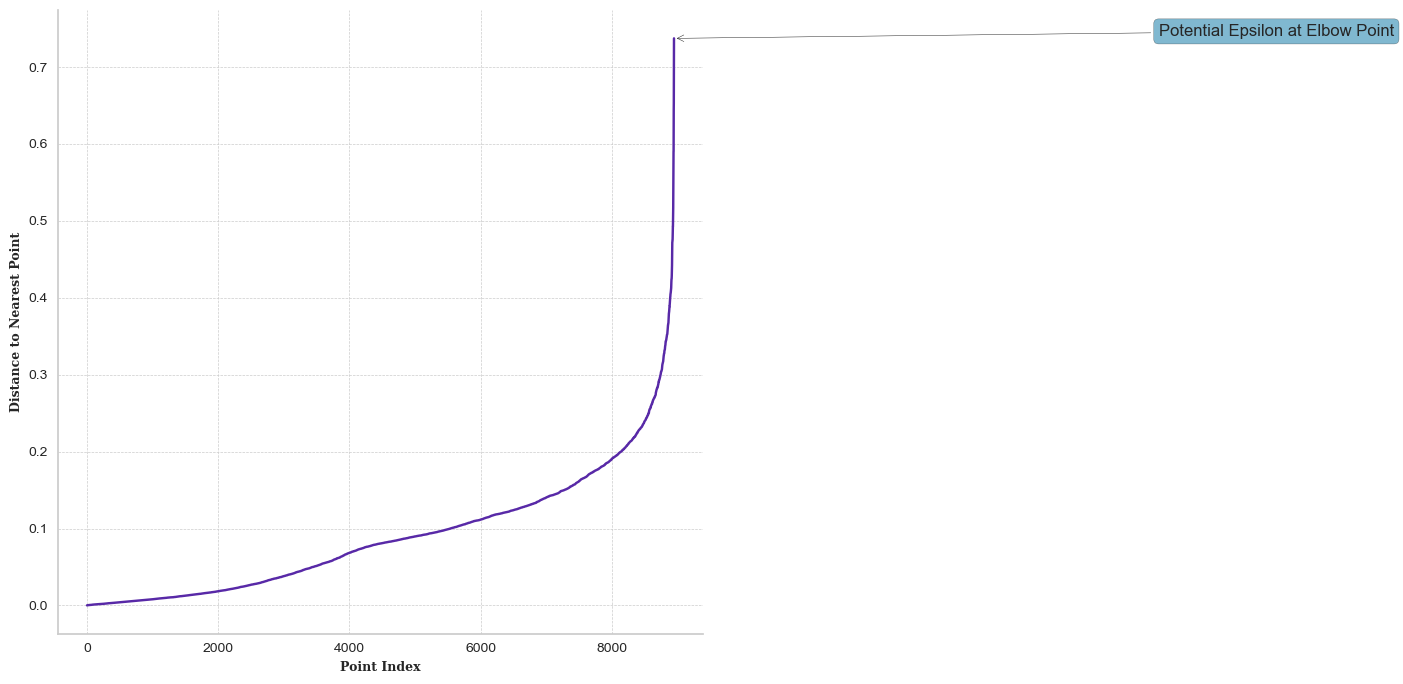

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from matplotlib.patches import Rectangle

def calculate_epsilon(X):
    # Calculate the distances to the nearest neighbors
    neighbors = NearestNeighbors(n_neighbors=4)
    nbrs = neighbors.fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances, axis=0)
    return distances[:, 2]

def plot_epsilon(distances):
    # Create plot to visualize the elbow method for epsilon determination
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.plot(distances, color='#5829A7')
    ax.set_xlabel('Point Index', fontsize=9, fontweight='bold', fontfamily='serif')
    ax.set_ylabel('Distance to Nearest Point', fontsize=9, fontweight='bold', fontfamily='serif')
    
    # Highlight the potential elbow point in the plot
    ax.annotate('Potential Epsilon at Elbow Point', xy=(distances.argmax(), distances.max()), 
                xytext=(distances.argmax() - 8600, distances.max() + 1), textcoords='offset points', 
                arrowprops=dict(arrowstyle='->', color='black'), fontsize=12, bbox=dict(boxstyle='round', alpha=0.5))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add grid and set layout tight
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Calculate distances and plot epsilon
distances = calculate_epsilon(X)
plot_epsilon(distances)


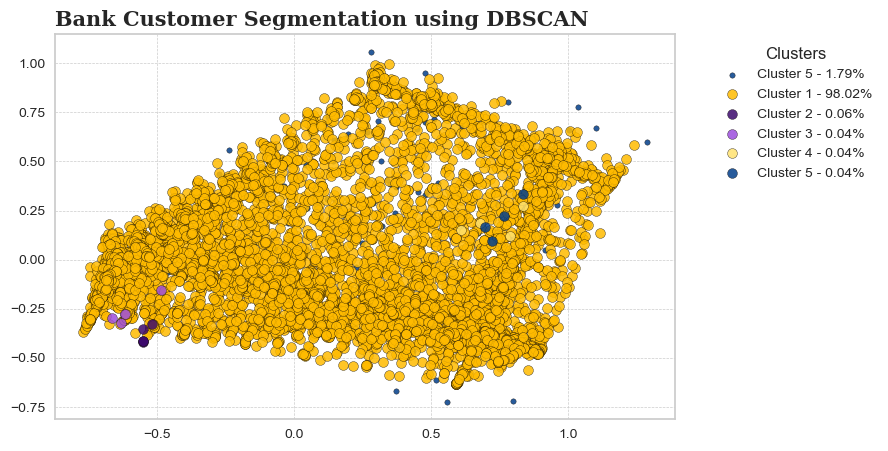

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

def perform_dbscan(X):
    # DBSCAN Algorithm Configuration and Execution
    dbscan = DBSCAN(eps=0.3, min_samples=4)  
    y_dbscan = dbscan.fit_predict(X)
    return dbscan, y_dbscan

def calculate_cluster_percentages(y_dbscan):
    # Calculate the percentage of each cluster including outliers
    unique, counts = np.unique(y_dbscan, return_counts=True)
    total = sum(counts)
    percentages = {k: (v / total * 100) for k, v in zip(unique, counts)}
    return percentages

def visualize_dbscan_results(X, y_dbscan, percentages):
    # Define cluster colors and labels
    cluster_colors = ['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270', '#023E8A']  # Colors for clusters and outliers
    labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4','Cluster 5']

    # Create plot
    fig, ax = plt.subplots(figsize=(8, 5))
    for cluster_id in np.unique(y_dbscan):
        if cluster_id == -1:
            size, label = 15, f"{labels[-1]} - {percentages[cluster_id]:.2f}%"
        else:
            size, label = 50, f"{labels[cluster_id]} - {percentages[cluster_id]:.2f}%"
        ax.scatter(X[y_dbscan == cluster_id, 0], X[y_dbscan == cluster_id, 1],
                   s=size, c=cluster_colors[cluster_id], label=label, alpha=0.85, edgecolor='#100C07')
    
    # Styling and annotations
    ax.set_title('Bank Customer Segmentation using DBSCAN', loc='left', fontsize=15, fontweight='heavy', fontfamily='serif')
    ax.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Running DBSCAN and visualizing the results
dbscan, y_dbscan = perform_dbscan(X)
percentages = calculate_cluster_percentages(y_dbscan)
visualize_dbscan_results(X, y_dbscan, percentages)


In [69]:
# --- Evaluate DBSCAN Quality ---
db_dbscan, ss_dbscan, ch_dbscan = evaluate_clustering(X, y_dbscan)

.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index: 1.646
.: Silhouette Score: 0.028
.: Calinski Harabasz Index: 25.717


### **3. Gaussian Mixture Models (GMM)**

In [71]:
from sklearn.mixture import GaussianMixture
import numpy as np


# Assuming X is your normalized data


# Specify the range of number of clusters to consider
min_clusters = 1
max_clusters = 5
n_clusters_range = range(min_clusters, max_clusters)


# Initialize lists to store BIC and AIC scores
bic_scores = []
aic_scores = []


# Loop over each number of clusters
for n_clusters in n_clusters_range:
    # Instantiate the GMM model
    gmm = GaussianMixture(n_components=n_clusters)


   # Fit the model to your data
    gmm.fit(X)
    
    # Get the BIC and AIC scores for the current model
    bic_scores.append(gmm.bic(X))
    aic_scores.append(gmm.aic(X))


# Find the optimal number of clusters based on BIC and AIC scores
optimal_n_clusters_bic = n_clusters_range[np.argmin(bic_scores)]
optimal_n_clusters_aic = n_clusters_range[np.argmin(aic_scores)]


print("Optimal number of clusters (BIC):", optimal_n_clusters_bic)
print("Optimal number of clusters (AIC):", optimal_n_clusters_aic)

Optimal number of clusters (BIC): 4
Optimal number of clusters (AIC): 4


In [72]:
from sklearn.mixture import GaussianMixture

# Specify the number of clusters
n_clusters = 4 


# Instantiate the GMM model
gmm = GaussianMixture(n_components=n_clusters)


# Fit the model to your data
gmm.fit(X)


# Predict the cluster labels for each point
labels = gmm.predict(X)

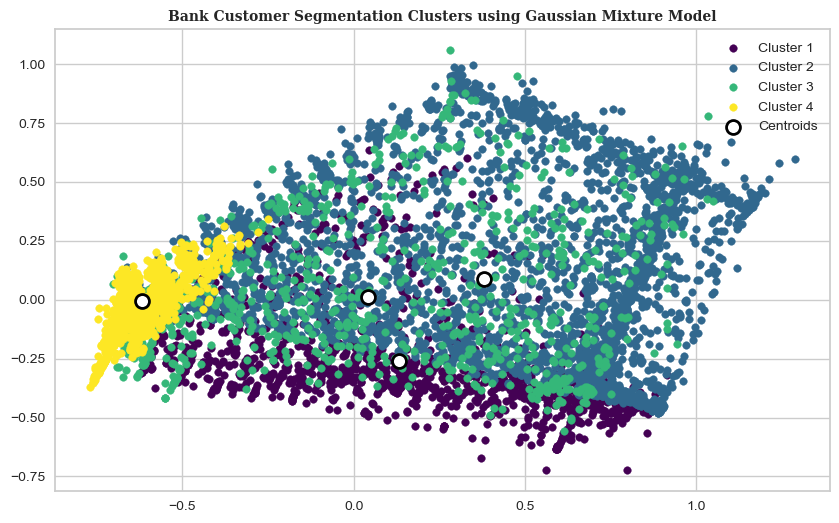

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


# Specify the number of clusters
n_clusters = 4 

# Instantiate the GMM model
gmm = GaussianMixture(n_components=n_clusters)

# Fit the model to your data
gmm.fit(X)

# Predict the cluster labels for each data point
labels = gmm.predict(X)

# Get the cluster centers (means of the Gaussians)
centers = gmm.means_

# Creating the plot
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))

# Scatter plot of data colored by GMM cluster assignment
for i, color in enumerate(colors):
    # Select only data observations with cluster label == i
    data = X[labels == i]
    # Plot the data observations
    plt.scatter(data[:, 0], data[:, 1], s=30, color=color, label=f'Cluster {i+1}')

# Mark the centroids with a white O
plt.scatter(centers[:, 0], centers[:, 1], s=100, marker='o', color='white', edgecolors='black', linewidth=2, label='Centroids')

plt.title('Bank Customer Segmentation Clusters using Gaussian Mixture Model', fontsize=10, fontweight='heavy', fontfamily='serif')
plt.legend()
plt.grid(True)
plt.show()


In [74]:
# --- Evaluate GaussianMixture Quality ---
db_gmm, ss_gmm, ch_gmm = evaluate_clustering(X, labels)

.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index: 2.995
.: Silhouette Score: 0.172
.: Calinski Harabasz Index: 1586.081


## **4. Deep Belief Networks (DBN)**

Deep Belief Networks (DBNs): DBNs are probabilistic generative models composed of multiple layers of latent variables. They can capture hierarchical representations of data and are effective in learning complex patterns. By training DBNs on customer data, you can extract meaningful features for clustering, which can lead to more interpretable segmentation results.

In [77]:
from sklearn.cluster import KMeans
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(df)

# Convert DataFrame to NumPy array
data = X_normalized.astype(np.float32)

# Convert NumPy array to PyTorch tensor
data_tensor = torch.tensor(data)

# Define the Deep Belief Network (DBN) architecture
class DBN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DBN, self).__init__()
        self.rbm1 = nn.Linear(input_dim, hidden_dim)
        self.rbm2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.sigmoid(self.rbm1(x))
        x = torch.sigmoid(self.rbm2(x))
        return x

# Define hyperparameters
input_dim = data.shape[1]  # Number of features
hidden_dim = 100  # Number of hidden units
output_dim = 17  # Number of output units (should match input_dim)

# Initialize the DBN model
model = DBN(input_dim, hidden_dim, output_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Define data loader
batch_size = 64
data_loader = DataLoader(TensorDataset(data_tensor), batch_size=batch_size, shuffle=True)

# Training the DBN model
num_epochs = 100
for epoch in range(num_epochs):
    for batch in data_loader:
        optimizer.zero_grad()
        inputs = batch[0]
        
        # Ensure inputs have the correct shape for the DBN model
        inputs = inputs.view(-1, input_dim)
        
        outputs = model(inputs)
        
        # Ensure outputs have the same shape as inputs for computing the loss
        outputs = outputs.view(inputs.size())
        
        loss = criterion(outputs, inputs)  # Reconstruction loss
        loss.backward()
        optimizer.step()

# Extract features using the DBN model
with torch.no_grad():
    features = model.rbm1(data_tensor).numpy()  # Output of the first RBM layer

# Ensure the features are reshaped properly for K-means clustering
features = features.reshape(-1, hidden_dim)  # Assuming 'hidden_dim' is the number of features from the DBN

# Perform K-means clustering on the extracted features
k = 4 # Number of clusters
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(features)

# Now 'clusters' contains the cluster assignments for each data point

In [78]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assuming 'clusters' are the predicted cluster labels obtained from K-means clustering

# Silhouette Score
silhouette = silhouette_score(data, clusters)

# Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(data, clusters)

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(data, clusters)

print('.: Evaluate Clustering Quality :.')
print('*' * 34)
print("Davies-Bouldin Index:", davies_bouldin)
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski_harabasz)



.: Evaluate Clustering Quality :.
**********************************
Davies-Bouldin Index: 1.9595130192073114
Silhouette Score: 0.1954361
Calinski-Harabasz Score: 3138.6707127102513


## **5. K-Means**

The effectiveness of the K-means clustering method hinges on the quality of the clusters it produces. However, determining the ideal number of clusters presents a significant challenge. Various approaches exist to determine this optimal number, but we'll focus on the most suitable method for identifying the appropriate number of clusters, denoted as 'K'. 
The dataset lacks definitive labels to classify products or customers into specific clusters. To identify the optimal number of clusters, we employed the Silhouette method and the Elbow method within the K-Means technique. These methods pinpoint a saturation point where additional clusters cease to notably enhance model performance and where the rate of variance reduction notably decelerates. Consequently, we designate the cluster column as the true label for categorizing customers into distinct groups.

### 5.1. Elbow Method

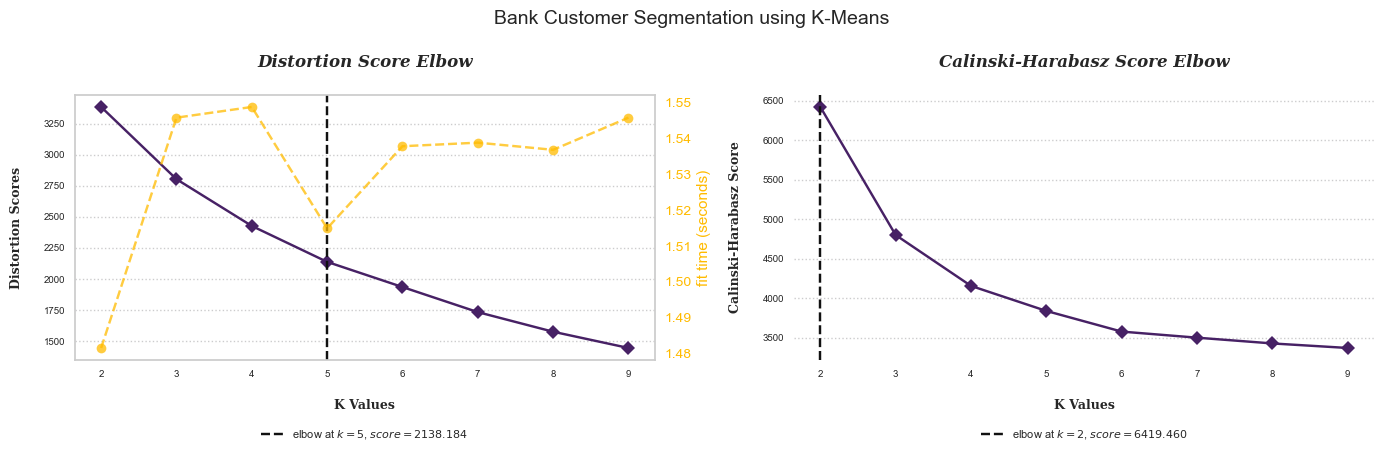

In [82]:
def plot_elbow_visualizer(X, metric=None, figsize=(14, 5), k_range=(2, 10), random_state=32, max_iter=500):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    elbow_score = KElbowVisualizer(KMeans(random_state=random_state, max_iter=max_iter), k=k_range,  metric='distortion', ax=ax1)
    elbow_score.fit(X)
    elbow_score.finalize()
    format_ax(elbow_score.ax, 'Distortion Score Elbow\n')

    elbow_score_ch = KElbowVisualizer(KMeans(random_state=random_state, max_iter=max_iter), k=k_range, metric='calinski_harabasz', timings=False, ax=ax2)
    elbow_score_ch.fit(X)
    elbow_score_ch.finalize()
    format_ax(elbow_score_ch.ax, 'Calinski-Harabasz Score Elbow\n')

    plt.suptitle('Bank Customer Segmentation using K-Means', fontsize=14)
    plt.tight_layout()
    plt.show()

def format_ax(ax, title):
    title_style = dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    text_style = dict(fontweight='bold', fontfamily='serif')

    ax.set_title(title, **title_style)
    ax.tick_params(labelsize=7)
    for text in ax.legend_.texts:
        text.set_fontsize(9)
    for spine in ax.spines.values():
        spine.set_color('None')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
    ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    ax.grid(axis='x', alpha=0)
    ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    ax.set_ylabel('Distortion Scores\n' if 'Distortion' in title else 'Calinski-Harabasz Score\n', fontsize=9, **text_style)

# Call the function
plot_elbow_visualizer(X)

After analyzing the outcomes of the Elbow method and the Calinski Harabasz score, it's evident that the most suitable clustering number for the K-Means algorithm is five clusters. Subsequently, we will implement this optimal cluster count, generate visualizations depicting cluster distribution, and utilize silhouette plots to assess their effectiveness

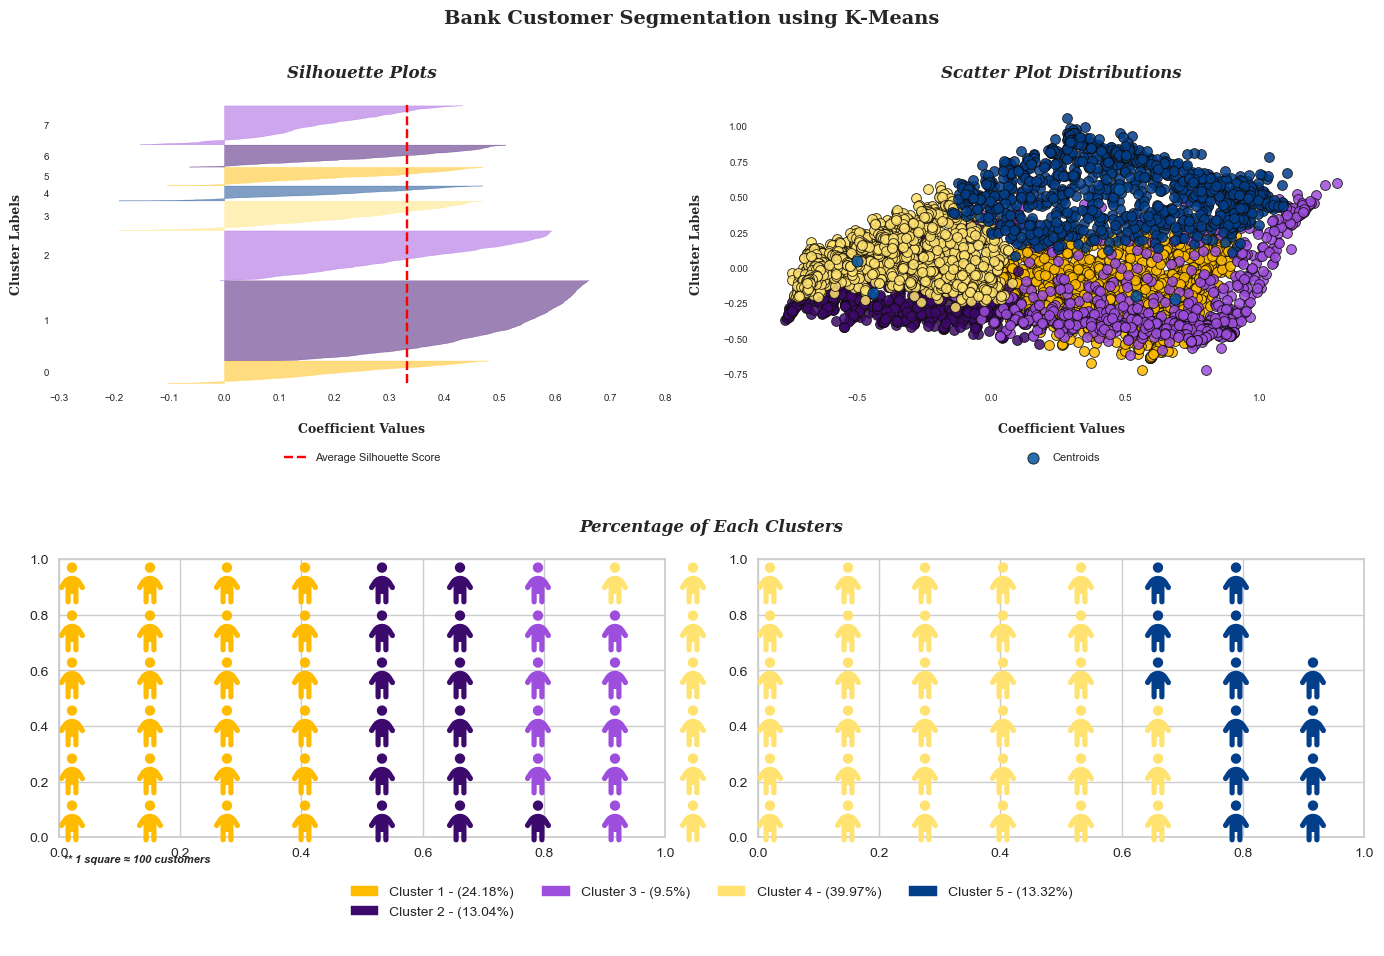

In [84]:
def plot_kmeans_visualization(X, y_kmeans):
    # Define colors and labels
    cluster_colors = ['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270','#023E8A' ]
    labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4','Cluster 5', 'Centroids']

    # Set figure settings
    title_font = dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    text_style = dict(fontweight='bold', fontfamily='serif')
    scatter_style = dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
    legend_style = dict(borderpad=2, frameon=False, fontsize=8)
    fig, ((ax1, ax2), (ax3, _)) = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot Silhouette Plots of Clusters
    s_viz = SilhouetteVisualizer(KMeans(), ax=ax1, colors=cluster_colors)
    s_viz.fit(X)
    s_viz.finalize()
    format_ax(s_viz.ax, 'Silhouette Plots\n')

    # Plot Scatter Plot Clusters Distributions
    y_kmeans_labels = np.unique(y_kmeans)
    for i in y_kmeans_labels:
        ax2.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=50, c=cluster_colors[i], **scatter_style)
    ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=65, c='#0353A4', label='Centroids', **scatter_style)
    format_ax(ax2, 'Scatter Plot Distributions\n')

    
    # Plot Waffle Chart
    # Calculate the frequency of each cluster
    cluster_freqs = np.unique(y_kmeans, return_counts=True)[1]

    # Calculate the percentage of each cluster
    cluster_perc = np.round(cluster_freqs / np.sum(cluster_freqs) * 100, 2)

    # Create the waffle chart
    ax3=plt.subplot(2, 2, (3,4))
    ax3.set_title('Percentage of Each Clusters\n', **title_font)
    ax3.set_aspect(aspect='auto')
    Waffle.make_waffle(ax=ax3, rows=6, values=cluster_perc, colors=cluster_colors,
                    labels=[f"Cluster {i+1} - ({k}%)" for i, k in enumerate(cluster_perc)],
                    icons='child', icon_size=30,
                    legend={'loc': 'upper center', 'bbox_to_anchor': (0.5, -0.05), 'ncol': 4, 'borderpad': 2,
                            'frameon': False, 'fontsize':10})
    

    # Add a note about the waffle chart
    ax3.text(0.01, -0.09, '** 1 square ≈ 100 customers', weight='bold', style='italic', fontsize=8)
    
    # Set Suptitle & Adjust Layout
    plt.suptitle('Bank Customer Segmentation using K-Means\n', fontsize=14, **text_style)
    plt.tight_layout()
    plt.show()

def format_ax(ax, title):
    title_style = dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    text_style = dict(fontweight='bold', fontfamily='serif')

    ax.set_title(title, **title_style)
    ax.tick_params(labelsize=7)
    if ax.legend_ is not None:
        for text in ax.legend_.texts:
            text.set_fontsize(9)
    for spine in ax.spines.values():
        spine.set_color('None')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
    ax.grid(axis='y', alpha=0, color='#9B9A9C', linestyle='dotted')
    ax.grid(axis='x', alpha=0)
    ax.set_xlabel('\nCoefficient Values', fontsize=9, **text_style)
    ax.set_ylabel('Cluster Labels\n', fontsize=9, **text_style)

# --- Implementing K-Means ---
kmeans = KMeans(n_clusters=5, random_state=32, max_iter=500)
y_kmeans = kmeans.fit_predict(X)

# --- Calling K-Means Functions ---
plot_kmeans_visualization(X, y_kmeans)

The provided image displays various metrics for each cluster, including silhouette coefficient values, scatter plot distributions, and the count of customers in each cluster. Analysis of the silhouette coefficients indicates that all clusters perform optimally, with each cluster's value surpassing the average except cluster 3. Furthermore, examining the silhouette plot reveals consistent fluctuations across all clusters, although clusters 4 and 1 exhibit notably thicker consistency compared to others.

As previously noted, clusters 4 and 1 demonstrate higher density relative to other clusters, primarily due to the majority of data points congregating in the bottom-left corner of the scatter plot. These clusters also encompass more than 64% of the total customer count.The waffle chart provided below the visualization illustrates the percentage distribution of customers within each group.

In [86]:
# --- Evaluate K-Means Cluster Quality ---
db_kmeans, ss_kmeans, ch_kmeans = evaluate_clustering(X, y_kmeans)


.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index: 1.27
.: Silhouette Score: 0.331
.: Calinski Harabasz Index: 3840.79


According to the evaluation scores provided, the clustering quality achieved with K-Means utilizing five clusters is **satisfactory**. This observation arises from **the overlap observed between clusters**, as depicted in the scatter plot presented earlier

## Application of XAI Techniques

### Cluster Feature Analysis

In [88]:
def print_cluster_feature_contribution(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=32)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_


    print("Feature contributions for each cluster:")
    for i, centroid in enumerate(centroids):
        print(f"Cluster {i+1} centroid: {centroid}")


# Assuming you've found an optimal k (let's say 5 for this example)
print_cluster_feature_contribution(X, 5)

Feature contributions for each cluster:
Cluster 1 centroid: [ 0.53801924 -0.20105203 -0.23611248  0.03543745  0.03228095 -0.00643519
 -0.00922941 -0.02486982]
Cluster 2 centroid: [-0.44336012 -0.17874642  0.31026906  0.16013319  0.29520908  0.05630336
 -0.00267948  0.00609939]
Cluster 3 centroid: [ 0.68380373 -0.21705578  0.46782858 -0.15438453 -0.1874841   0.0047176
  0.01015686  0.01458618]
Cluster 4 centroid: [-0.50162707  0.04512904 -0.0905991  -0.06528173 -0.09120495 -0.01136719
  0.00735753  0.01287003]
Cluster 5 centroid: [ 0.47501215  0.5593494   0.06315613  0.08488047  0.05976228 -0.01269278
 -0.00994279 -0.009844  ]


### Cluster Feature Contribution

In [89]:
import numpy as np
from sklearn.cluster import KMeans


# X is the dataset, assume you have determined the optimal number of clusters k
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_


# feature_names is the list of your feature names
feature_names = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


print("Centroid coordinates for each cluster:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}:")
    for feature, value in zip(feature_names, centroid):
        print(f"  {feature}: {value:.2f}")

Centroid coordinates for each cluster:
Cluster 0:
  BALANCE: 0.54
  BALANCE_FREQUENCY: -0.20
  PURCHASES: -0.24
  ONEOFF_PURCHASES: 0.04
  INSTALLMENTS_PURCHASES: 0.03
  CASH_ADVANCE: -0.01
  PURCHASES_FREQUENCY: -0.01
  ONEOFF_PURCHASES_FREQUENCY: -0.02
Cluster 1:
  BALANCE: -0.50
  BALANCE_FREQUENCY: 0.05
  PURCHASES: -0.09
  ONEOFF_PURCHASES: -0.07
  INSTALLMENTS_PURCHASES: -0.09
  CASH_ADVANCE: -0.01
  PURCHASES_FREQUENCY: 0.01
  ONEOFF_PURCHASES_FREQUENCY: 0.01
Cluster 2:
  BALANCE: 0.48
  BALANCE_FREQUENCY: 0.56
  PURCHASES: 0.06
  ONEOFF_PURCHASES: 0.08
  INSTALLMENTS_PURCHASES: 0.06
  CASH_ADVANCE: -0.01
  PURCHASES_FREQUENCY: -0.01
  ONEOFF_PURCHASES_FREQUENCY: -0.01
Cluster 3:
  BALANCE: -0.44
  BALANCE_FREQUENCY: -0.18
  PURCHASES: 0.31
  ONEOFF_PURCHASES: 0.16
  INSTALLMENTS_PURCHASES: 0.30
  CASH_ADVANCE: 0.06
  PURCHASES_FREQUENCY: -0.00
  ONEOFF_PURCHASES_FREQUENCY: 0.01
Cluster 4:
  BALANCE: 0.68
  BALANCE_FREQUENCY: -0.22
  PURCHASES: 0.47
  ONEOFF_PURCHASES: -0.15
  I

### Feature Contribution to Variance Between Clusters

In [90]:
total_variance = np.var(X, axis=0)
cluster_variance = np.var(centroids, axis=0)
relative_contribution = cluster_variance / total_variance


print("Relative contribution of each feature to cluster separation:")
for feature, contribution in zip(feature_names, relative_contribution):
    print(f"{feature}: {contribution:.2f}")

Relative contribution of each feature to cluster separation:
BALANCE: 0.80
BALANCE_FREQUENCY: 0.93
PURCHASES: 0.78
ONEOFF_PURCHASES: 0.24
INSTALLMENTS_PURCHASES: 0.58
CASH_ADVANCE: 0.03
PURCHASES_FREQUENCY: 0.01
ONEOFF_PURCHASES_FREQUENCY: 0.02


### LIME

In [91]:
import numpy as np
from sklearn.cluster import KMeans
import lime
from lime.lime_tabular import LimeTabularExplainer 

# Assuming you have a trained K-means model
def predict_proba(X):
    predictions = kmeans.predict(X)
    probabilities = np.zeros((X.shape[0], len(np.unique(predictions))))
    for i, pred in enumerate(predictions):
        probabilities[i, pred] = 1
    return probabilities


# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X),
    feature_names=feature_names,
    class_names=['Cluster 1', 'Cluster 2'],
    mode='classification'
)


# Explain an instance
i = 10  # Index of the instance in your dataset
exp = explainer.explain_instance(X[i], predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)

### Principal Component Analysis (PCA) in XAI

Explained variance by PCA components:
Principal Component 1: 0.51
Principal Component 2: 0.14
Principal Component 3: 0.13
Principal Component 4: 0.08
Principal Component 5: 0.07
Principal Component 6: 0.04
Principal Component 7: 0.02
Principal Component 8: 0.01


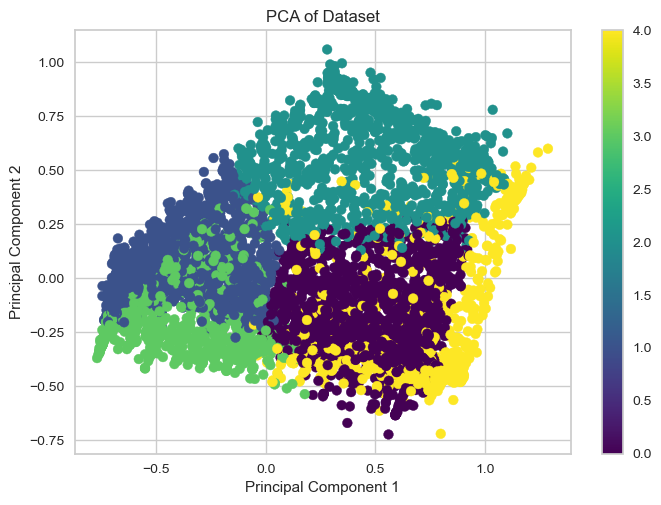

In [92]:
from sklearn.decomposition import PCA


pca = PCA(n_components=8)  # Adjust components based on your data
X_pca = pca.fit_transform(X)


kmeans_pca = KMeans(n_clusters=5, random_state=42)
kmeans_pca.fit(X_pca)


print("Explained variance by PCA components:")
for i, variance in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component {i+1}: {variance:.2f}")


# Optional: Plot PCA components against cluster labels to visualize clustering
import matplotlib.pyplot as plt


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.colorbar()
plt.show()

### Pickle Kmeans Model

In [93]:
import pickle
# --- Saving KMeans Model ---

with open('kmeans_model.pkl', 'wb') as kmeans_model_file:

   pickle.dump(kmeans, kmeans_model_file)

### Retained Features for Model Training

In [102]:
import numpy as np


feature_names = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
                 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


def identify_retained_features(X, pca_model, feature_names):
    # Get the indices of the features based on their variance
    feature_indices = np.argsort(np.var(X @ pca_model.components_, axis=0))[::-1]
    retained_feature_indices = feature_indices[:pca_model.n_components_]
    
    # Extract retained feature names
    retained_feature_names = [feature_names[i] for i in retained_feature_indices]
    
    return retained_feature_names


# Assuming you have the original feature names in a list called 'feature_names'
retained_feature_names = identify_retained_features(X, pca, feature_names)


print("Retained features after PCA:")
print(retained_feature_names)

Retained features after PCA:
['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY']
